# 1. Problem Definition

## Objective
The aim of this project is to analyze the factors influencing Airbnb rental prices in Milan and develop robust predictive models. By leveraging exploratory data analysis (EDA) and machine learning techniques, such as linear regression and decision trees, we will identify key features affecting rental prices and assess the performance of different models.

## Approach
To achieve this, we will:
- Conduct a thorough **exploratory data analysis (EDA)** to understand the dataset, detect anomalies, and extract insights.
- Use **clustering techniques** to group similar Airbnb listings based on relevant attributes.
- Implement **supervised learning models**, including **linear regression** and **decision trees**, to predict rental prices based on key features.

# 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math


In [2]:
import warnings 
warnings.filterwarnings('ignore')

# 3. Loading dataset

In [3]:
# loading the dataset
path =  r"C:\Users\emmaa\OneDrive\Documents\0. NTU\__CB0494_INTRO_DS_AI\CB0494_DSAI_CODING\mini_project\data.csv"
# path = "/Users/daliabetinjaneh/Desktop/DSAI project/Airbnb_Milan.csv"
df = pd.read_csv(path)

As per the guidelines mentioned in class, we put the path of the file in a variable, that we use for functions requiring the path of the dataset, in order to reduce the risk of errors/typos and make it easier to get the path whenever we need it.

In [4]:
# visualize top 5 rows to get an idea of the data
df.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0       TIBALDI  45.44119    9.17813     Private room    100               4   
1       NAVIGLI  45.44806    9.17373  Entire home/apt    150               1   
2         SARPI  45.47647    9.17359     Private room    180               1   
3   VIALE MONZA  45.52014    9.22300  Entire home/apt     75               2   
4   VIALE MONZA  45.51874    9.22495  Entire home/apt     71               2   

   number_of_reviews last_review  reviews_per_month  \
0                 12    19/04/10               0.14   
1                 15    07/09/20               0.21   
2                  8    22/04/12               0.11   
3                 15    01/07/18               0.23   
4                 29    23/10/16               0.71   

   calculated_host_listings_count  availability_365  
0                               1               358  
1                               1               363  
2                               1               365  
3                               3               200  
4                               3               308

## Basic information about dataset

In [5]:
# dataset shape (number of rows and columns)
print("Dataset Shape:", df.shape)   

Dataset Shape: (18322, 15)


In [6]:
# dataset information (data types, non-null counts, etc.)
print("Dataset Info:")
df.info() 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18322 entries, 0 to 18321
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18322 non-null  int64  
 1   name                            18312 non-null  object 
 2   host_id                         18322 non-null  int64  
 3   host_name                       18198 non-null  object 
 4   neighbourhood                   18322 non-null  object 
 5   latitude                        18322 non-null  float64
 6   longitude                       18322 non-null  float64
 7   room_type                       18322 non-null  object 
 8   price                           18322 non-null  int64  
 9   minimum_nights                  18322 non-null  int64  
 10  number_of_reviews               18322 non-null  int64  
 11  last_review                     13260 non-null  object 
 12  reviews_per_month 

In [7]:
# get numerical and object-type variables
num_vars = df.select_dtypes(include=['number']).columns.tolist()  # Numerical variables 
cat_vars = df.select_dtypes(include=['object']).columns.tolist()  # Object-type variables 

# display variable counts
print(f"Numerical Variables: {len(num_vars)}")
print(f"Object (categorical) Variables: {len(cat_vars)}")

Numerical Variables: 10
Object (categorical) Variables: 5


#### Observations  
- The dataset primarily consists of numerical variables, with **all but five** being either integers or floats.  
- **Five variables** (`name`, `host_name`, `neighborhood`, `room_type`, and `last_review`) are stored as object-type.  
- However, **`last_review` represents a date**, making it more of a **temporal variable** rather than purely categorical. We will consider appropriate preprocessing for this variable in later stages of our analysis.  


#### Last Review
Before we proceed with the rest of our analysis, we will perform a transformation of the variables in our dataset - `last_review`, which is encoded as an object-variable, but actually presents temportal data.

Although it is a temporal variable, we can still extract useful information from it.  
Instead of using raw dates, we compute a new numerical variable `days_since_last_review`, which represents how many days have passed since the last review for each listing.

This transformation helps us understand how recently a listing has been active or booked, which might be a useful predictor of price or popularity.

In [8]:
# convert last_review to datetime
df["last_review"] = pd.to_datetime(df["last_review"], errors='coerce')

In [9]:
# get today's date
today = pd.to_datetime(datetime.today())

In [10]:
# compute days since last review
df["days_since_last_review"] = (today - df["last_review"]).dt.days

In [11]:
# basic descriptive statistics
df['days_since_last_review'].describe()

count    13260.000000
mean      2179.550000
std        604.875879
min       1214.000000
25%       1858.000000
50%       2032.000000
75%       2519.000000
max       5463.000000
Name: days_since_last_review, dtype: float64

Additionally, we need to add our new variable in the list of numerical variables.

In [12]:
num_vars.append('days_since_last_review')

## Summary statistics

In [13]:
# summary statistics for numerical variables
num_summary = df.describe()
print("Summary statistics for numerical variables:")
print(num_summary)


Summary statistics for numerical variables:
                 id       host_id      latitude     longitude         price  \
count  1.832200e+04  1.832200e+04  18322.000000  18322.000000  18322.000000   
mean   2.587132e+07  8.494918e+07     45.471318      9.187382    115.094913   
min    6.400000e+03  1.944000e+03     45.395050      9.060680      8.000000   
25%    1.214067e+07  1.243642e+07     45.454462      9.168782     50.000000   
50%    2.588718e+07  3.141304e+07     45.470875      9.186291     73.500000   
75%    3.926758e+07  1.335227e+08     45.486850      9.209680    110.000000   
max    5.095505e+07  4.117208e+08     45.539850      9.275280  11999.000000   
std    1.525744e+07  1.040579e+08      0.020731      0.029543    290.793019   

       minimum_nights  number_of_reviews                    last_review  \
count    18322.000000       18322.000000                          13260   
mean         5.798112          23.720827  2019-04-15 10:48:00.000000256   
min          1.0000

#### Observations on Summary Statistics  
- **Price** has a highly skewed distribution, with a median of €73.50 but a maximum of €11,999, indicating extreme outliers.  
- **Minimum nights** also shows significant variation, with most listings having short stays (median = 2 nights), but some extreme values (max = 1124 nights).  
- **Reviews per month** has a high proportion of zeros (25th percentile = 0.1), meaning many listings receive few or no reviews.  
- **Host listings count** is mostly 1 per host, but some hosts manage hundreds of properties, suggesting professional operators.  
- **Availability per year** varies widely, with some listings available all year (max = **365**), while others are rarely open (25th percentile = 0).  
- **Days since last review** varies from 1201 to 5450 days, with a median of around 2000 days. Of course, we take into account the fact that the dataset is not recent. Still, this indicates that many listings have not been reviewed for more than a decade, while some are still relatively recent. This variable may reflect the activity level or visibility of the listing.


## Missing Values

In [14]:
# check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])  # Only display columns with missing values


Missing values per column:
name                        10
host_name                  124
last_review               5062
reviews_per_month         5062
days_since_last_review    5062
dtype: int64


#### Observations on Missing Values  
- `name` and `host_name` have very few missing values (10 and 124, respectively), however we did not include them as predictors for our final machinea learning models, so there was no need to drop them of perform imputation.
- `last_review` (thus also `days_since_last_review`) and `reviews_per_month` have a substantial number of missing values (5062 out of 18322 observations), which suggests that many listings have never been reviewed.  
- The missing values in `last_review` are expected to correspond to listings with zero reviews, meaning they may not provide useful insights for price prediction.  

#### Next Steps  
- For `name` and `host_name`: Since these attributes are not relevant for price prediction, we can ignore  these columns. 
- For `last_review` and `reviews_per_month`: We will investigate whether imputing missing values (e.g., replacing NaNs with zeros for `reviews_per_month`) or removing these rows would be the best approach.  
- Further EDA will help determine the best strategy before proceeding with data cleaning.  

# 4. EDA (Exploratory Data Analysis)

The next step in our analysis is Exploratory Data Analysis (EDA).
In this step, we will proceed with generating plots for the variables we intend to use as predictors for our model and also for the target variable (price), as well looking at the joint distributions between some variables in order to better understand the structure of our data.

We will start by:  
- Plotting the **distribution of numerical variables** to check for skewness, examine visually the range of values, get a sense of the shape of the distribution and detect potential outliers.  
- Examining **joint distributions** to analyze relationships between key variables and price.  
- Looking at **categorical variables** to identify dominant categories and their influence on price.  


## 4.1. Univariate analysis

To analyze relationships between different variables and price, we will:    
- Use the already created `num_vars` and `cat_vars` lists, which contain all numerical/categorical variables. 
- Exclude non-relevant variables such as `id` and `host_id`, as they do not provide meaningful insights into price.  
- Look at the distributions, IQR, mean, median and outliers for each numerical variable, with the help of visualisations : boxplots, histograms and violin plots.
- Look at the central tendency (mean, median) and spread (IQR) for each variable numerically as well.

In [15]:
num_vars

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'days_since_last_review']

Looking at the variables (and the first 5 rows of the dataframe, check previous section), we notice immediately that it makes sense to exclude `id` and `host_id` from the list of numerical variables we want to use as predictors in our analysis, as they do not bring any potential insights into the price and are completely random.
So, we will proceed by excluding them from our list of variables.

In [16]:
excluded_vars = ['id', 'host_id']
num_vars_relevant_univar = [var for var in num_vars if var not in excluded_vars]

We now define the list of relevant categorical variables for univariate analysis. 
We exclude `last_review`, which is stored as an object but represents a date, so it's not meaningful to treat it as a categorical feature, as well as `host_name` and `name`, since they do not provide meaningful insights for predictive models.

In [17]:
# exclude 'last_review' because it's a temporal variable, and name variables
excluded_cat = ['last_review', 'name', 'host_name']
cat_vars_relevant_univar = [col for col in cat_vars if col not in excluded_cat]
print(cat_vars_relevant_univar)

['neighbourhood', 'room_type']


### 4.1.1 Visualizations: Numerical Variables

To gain a better understanding of the distribution of our numerical variables, we generate three types of univariate visualizations for each variable:

- **Histogram with KDE**: To analyze the shape of the distribution (skewness, modality) and detect any clusters or unusual spikes.
- **Boxplot**: To identify outliers and summarize the spread of the data using quartiles (Q1, median, Q3).
- **Violin plot**: To combine the benefits of KDE and boxplot in a single visual—helping us understand both the density and spread.

We apply these plots to all relevant numerical variables in our dataset (excluding irrelevant IDs). This will allow us to spot anomalies, understand typical value ranges, and identify features that may require transformation or scaling before modeling.

#### Histograms with KDE (Distribution + Skewness)

Histograms with Kernel Density Estimation (KDE) allow us to visualize the shape of the distribution for each numerical variable and assess characteristics such as symmetry, skewness, modality (multiple local minima), and presence of unusual spikes or gaps.

We also compute the **skewness coefficient**, which quantifies how asymmetric the distribution is:
- A **skewness ≈ 0** suggests a roughly symmetric distribution (like a normal distribution).
- A **positive skewness** indicates a **right-skewed** distribution (tail stretches to the right), common in price or review count variables.
- A **negative skewness** indicates a **left-skewed** distribution (tail stretches to the left), which is less common in Airbnb data.

Understanding the skewness helps us determine whether a variable may require **log transformation** or other preprocessing steps before modeling.

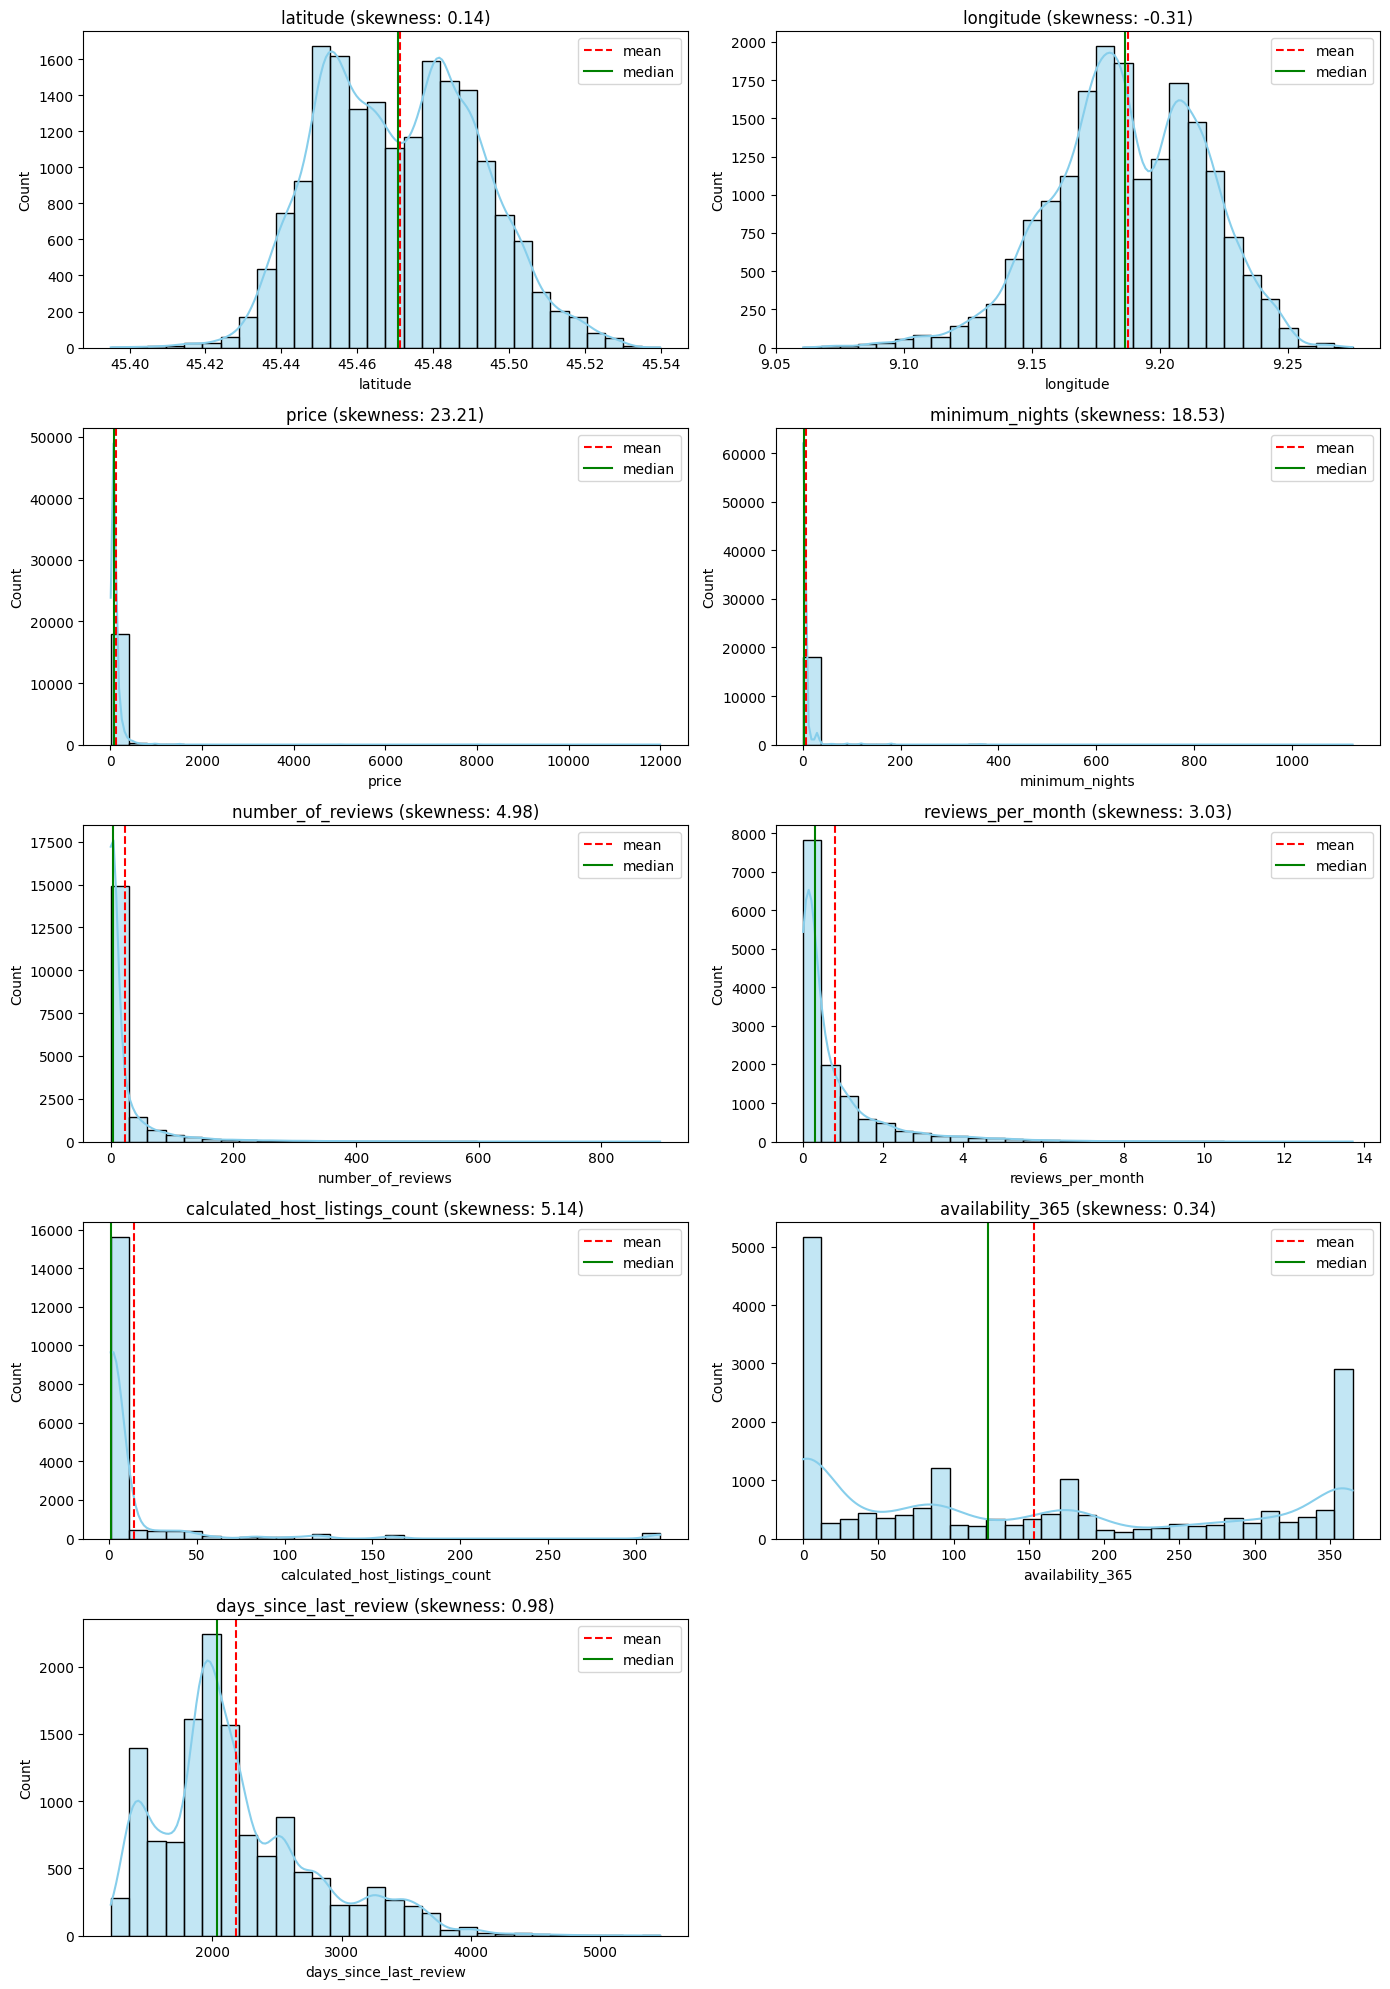

In [18]:
# define number of columns and rows for subplots
n_cols = 2
n_rows = int(np.ceil(len(num_vars_relevant_univar) / n_cols))

# create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()  # flatten for easy indexing

for i, col in enumerate(num_vars_relevant_univar):
    sb.histplot(df[col], kde=True, bins=30, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='median')
    skew = df[col].skew()
    axes[i].set_title(f"{col} (skewness: {skew:.2f})")
    axes[i].legend()

# remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Based on the histograms, we have the following observations about the numerical variables:

- **Latitude** and **longitude** are fairly symmetric.  
  Latitude shows a slight positive skew (0.14), and longitude a slight negative skew (-0.31), which means the Airbnb listings are fairly evenly spread across Milan without major directional bias.

- **Price** is extremely right-skewed (23.21).  
  Most listings are in the low price range, with a few very expensive properties pushing the distribution far to the right. These outliers could strongly affect the performance of our models.

- **Minimum nights** is also highly right-skewed (18.53).  
  The vast majority of listings allow short stays, but a few have extremely high values—possibly long-term rentals or incorrect data entries.

- **Number of reviews** and **reviews per month** are right-skewed as well (4.98 and 3.03).  
  Most listings receive few reviews, while a small group receives many, likely reflecting popularity or longer presence on the platform.

- **Host listings count** (calculated_host_listings_count) is strongly skewed (5.14).  
  Most hosts manage only one or a few properties, while some professional hosts operate a large number of listings.

- **Availability (365 days)** has a bimodal distribution and mild right skew (0.34).  
  Many listings are either always available (365 days) or never available (0 days), with fewer listings in between.

- **Days since last review** is moderately skewed (0.98).  
  Most listings haven’t received a review in a long time, but some still show relatively recent activity. This is also influenced by the fact that the dataset is not recent.

Overall, most numerical variables are skewed to the right, with several having extreme values or outliers. This is important to keep in mind for both preprocessing and modeling steps.

#### Boxplots of numerical variables

Boxplots allow us to examine the spread of each variable and identify the presence of outliers. They are especially useful for visualizing the interquartile range (IQR), medians, and extreme values.

However, in the case of highly skewed variables (such as price), the presence of extreme outliers can compress the main box area (Q1 to Q3), making it hard to interpret the typical range of values. We will analyze this further in the next step using a log transformation.

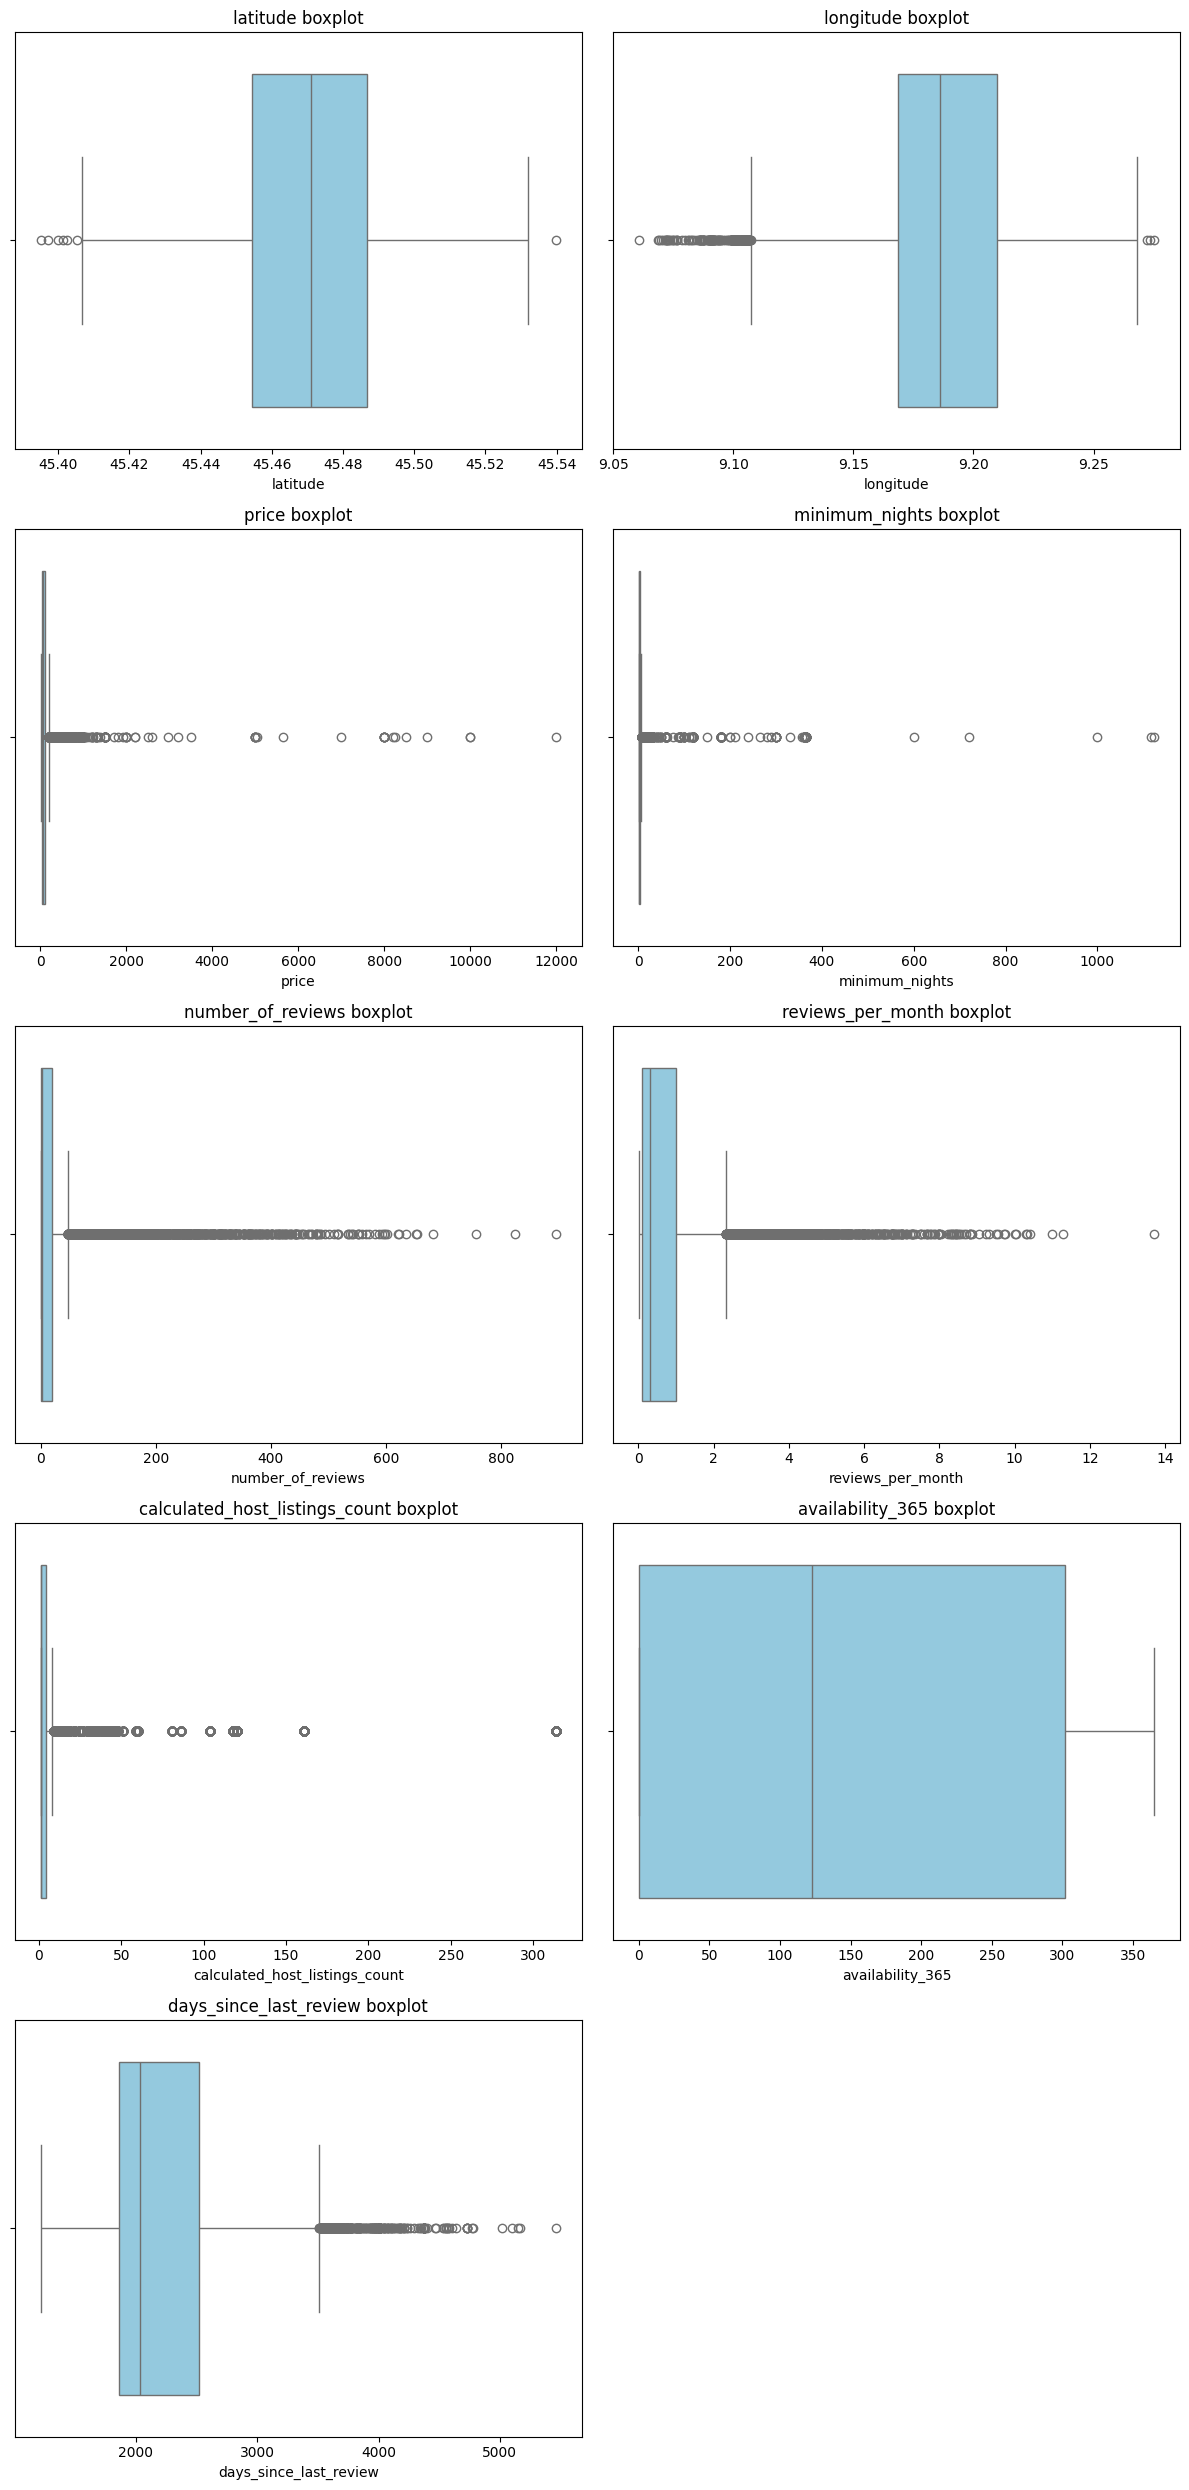

In [19]:
# 2 columns per row
cols = 2
rows = int(np.ceil(len(num_vars_relevant_univar) / cols))

plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(num_vars_relevant_univar):
    plt.subplot(rows, cols, i + 1)
    sb.boxplot(x=df[col], color="skyblue")
    plt.title(f"{col} boxplot")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

To address the issue of extreme outliers compressing the interquartile range in our boxplots, we apply a log transformation to the skewed numerical variables. This allows us to spread out the lower values and reduce the impact of high outliers, improving interpretability.

We use the transformation log(1 + x), which safely handles zeros (log(x) is not defined for x=0) while compressing large values.

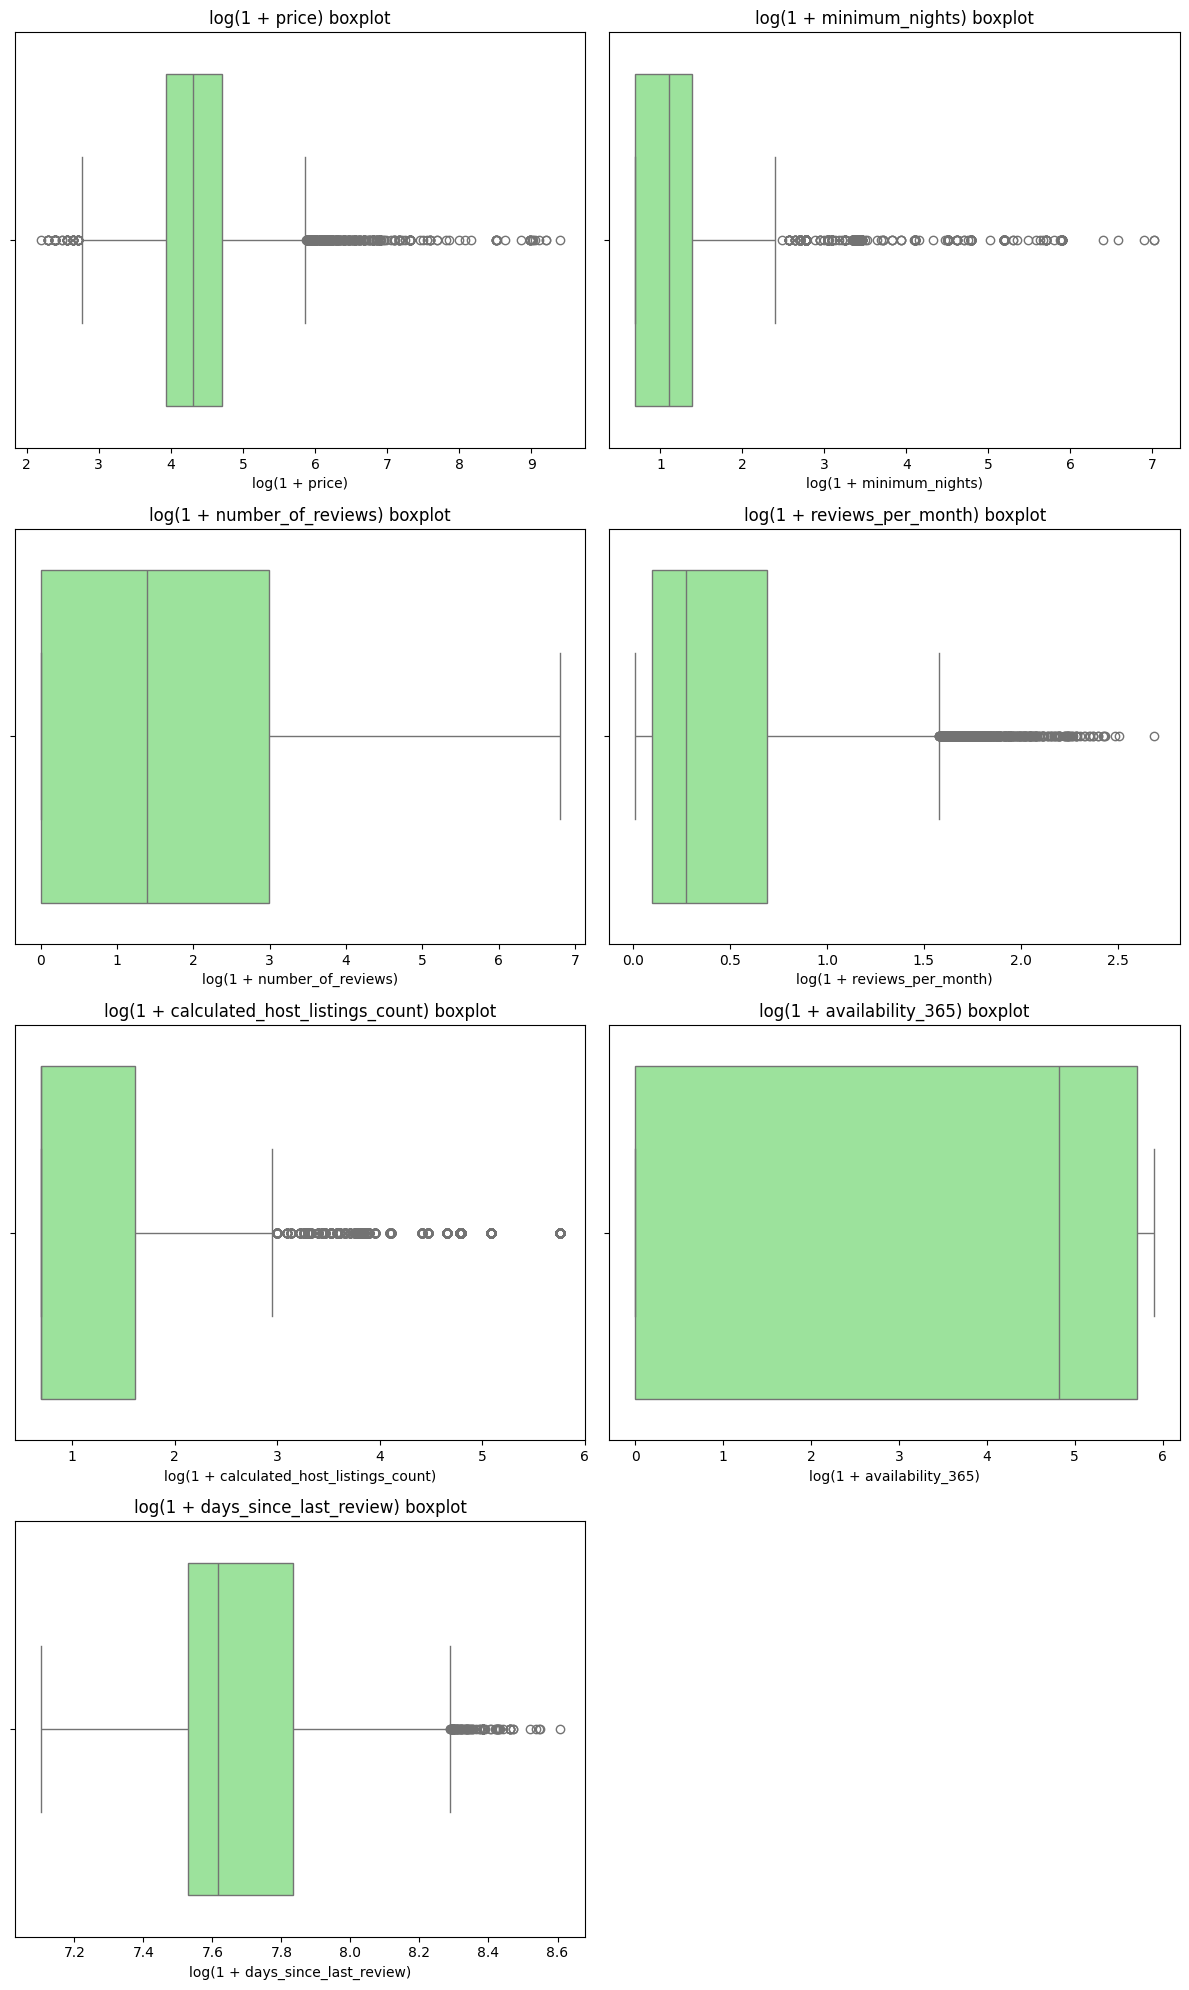

In [20]:
# exclude latitude and longitude from log transformation
vars_to_log = [col for col in num_vars_relevant_univar if col not in ['latitude', 'longitude']]

# 2 columns per row
cols = 2
rows = int(np.ceil(len(vars_to_log) / cols))

plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(vars_to_log):
    plt.subplot(rows, cols, i + 1)
    sb.boxplot(x=np.log1p(df[col]), color="lightgreen")
    plt.title(f"log(1 + {col}) boxplot")
    plt.xlabel(f"log(1 + {col})")

plt.tight_layout()
plt.show()

Based on the boxplots of the numerical variables, we can make the following observations:

- `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, and `calculated_host_listings_count` all contain many extreme outliers. In these plots, the interquartile range (IQR) appears very narrow compared to the overall range, which compresses the main part of the boxplot and makes interpretation difficult.
- `latitude` and `longitude` both appear approximately symmetric with very few outliers, as also seen in previous part. Their distributions are relatively centered and balanced, which is expected for geospatial data in a bounded area and a big city like Milan.
- `days_since_last_review` is moderately right-skewed, with many listings not reviewed for a long time.

After applying a `log(1 + x)` transformation:
- The variables that were heavily skewed became much more interpretable. For example, the transformed versions of `price`, `number_of_reviews`, and `minimum_nights` are more compact and balanced.
- While outliers are still present, their influence is reduced, and the IQR becomes visible.
- This transformation helps reveal the core structure of the data and will be useful in further analysis or modeling.


#### Violin plots

In this section, we generate violin plots for all relevant numerical variables in `num_vars_relevant_univar`. Violin plots combine the benefits of boxplots and KDE plots, allowing us to visualize both the summary statistics (like the median and IQR) and the shape of the distribution. This helps us detect multimodality, skewness, and outliers in a single compact visualization.

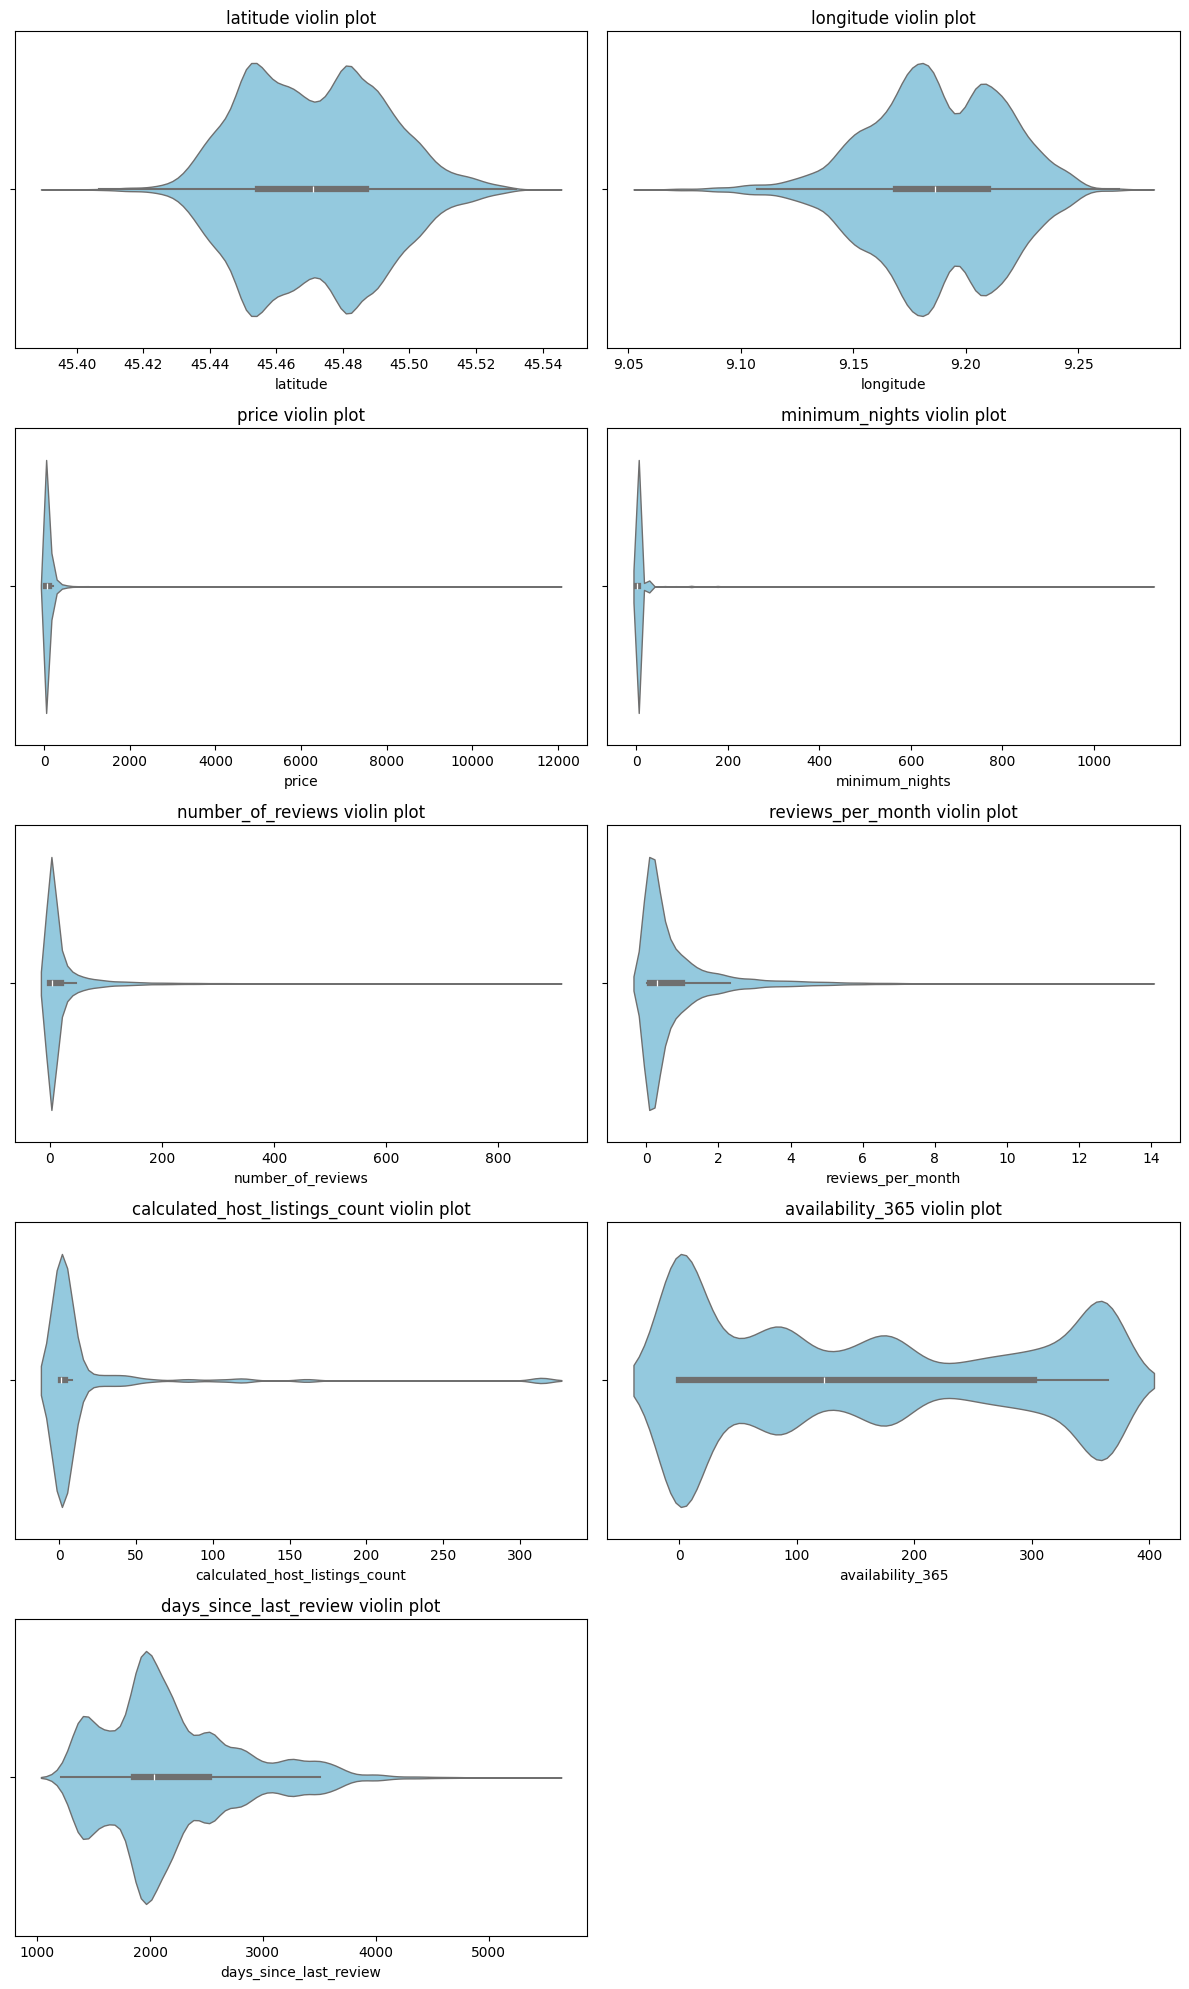

In [21]:
# define number of rows based on number of variables and 2 columns per row
n_vars = len(num_vars_relevant_univar)
n_cols = 2
n_rows = math.ceil(n_vars / n_cols)

# set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

# flatten axes for easy iteration
axes = axes.flatten()

# loop over variables and generate violin plots
for i, col in enumerate(num_vars_relevant_univar):
    sb.violinplot(x=df[col], ax=axes[i], color='skyblue', linewidth=1)
    axes[i].set_title(f"{col} violin plot")
    axes[i].set_xlabel(col)

# remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The violin plots confirm and complement the patterns observed in the histograms and boxplots. 

- `latitude` and `longitude` show roughly symmetric and unimodal distributions with no extreme outliers, as expected from geographical coordinates.
- Variables like `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, and `calculated_host_listings_count` display strong right-skewed distributions, with a sharp concentration near zero and long tails, highlighting the presence of many low values and a few extreme cases.
- `availability_365` shows a multimodal distribution with visible spikes around 0, 180, and 365 days.
- `days_since_last_review` has a moderately right-skewed shape, with the highest density around 1800–2200 days.

### 4.1.2 Analysis of numerical variables

#### Central Tendency

In [22]:
# central tendency for numerical variables
for col in num_vars_relevant_univar:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().iloc[0] if not df[col].mode().empty else "No mode"
    
    print(f"--- {col} ---")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode}")
    print()


--- latitude ---
Mean: 45.47
Median: 45.47
Mode: 45.4884

--- longitude ---
Mean: 9.19
Median: 9.19
Mode: 9.21423

--- price ---
Mean: 115.09
Median: 73.50
Mode: 50

--- minimum_nights ---
Mean: 5.80
Median: 2.00
Mode: 1

--- number_of_reviews ---
Mean: 23.72
Median: 3.00
Mode: 0

--- reviews_per_month ---
Mean: 0.80
Median: 0.31
Mode: 0.04

--- calculated_host_listings_count ---
Mean: 14.42
Median: 1.00
Mode: 1

--- availability_365 ---
Mean: 153.51
Median: 123.00
Mode: 0

--- days_since_last_review ---
Mean: 2179.55
Median: 2032.00
Mode: 2181.0



#### Spread & variability

In [23]:
# spread & variability for numerical variables
for col in num_vars_relevant_univar:
    std_dev = df[col].std()
    data_range = df[col].max() - df[col].min()

    print(f"--- {col} ---")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Range: {data_range:.2f}")
    print()


--- latitude ---
Standard Deviation: 0.02
Range: 0.14

--- longitude ---
Standard Deviation: 0.03
Range: 0.21

--- price ---
Standard Deviation: 290.79
Range: 11991.00

--- minimum_nights ---
Standard Deviation: 26.69
Range: 1123.00

--- number_of_reviews ---
Standard Deviation: 57.66
Range: 896.00

--- reviews_per_month ---
Standard Deviation: 1.22
Range: 13.70

--- calculated_host_listings_count ---
Standard Deviation: 46.30
Range: 313.00

--- availability_365 ---
Standard Deviation: 138.76
Range: 365.00

--- days_since_last_review ---
Standard Deviation: 604.88
Range: 4249.00



#### Price Distribution

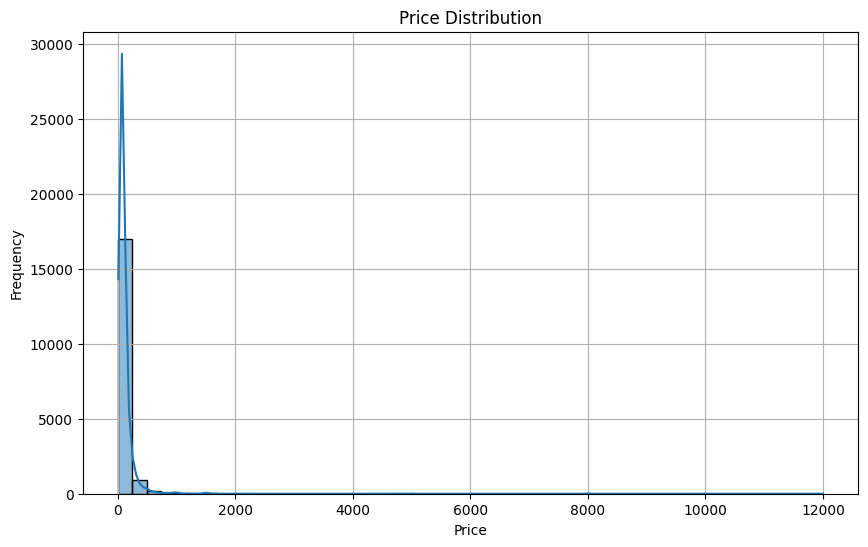

In [24]:
# understand how rental price spread out with KDE
plt.figure(figsize=(10, 6))
sb.histplot(df["price"], kde=True, bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


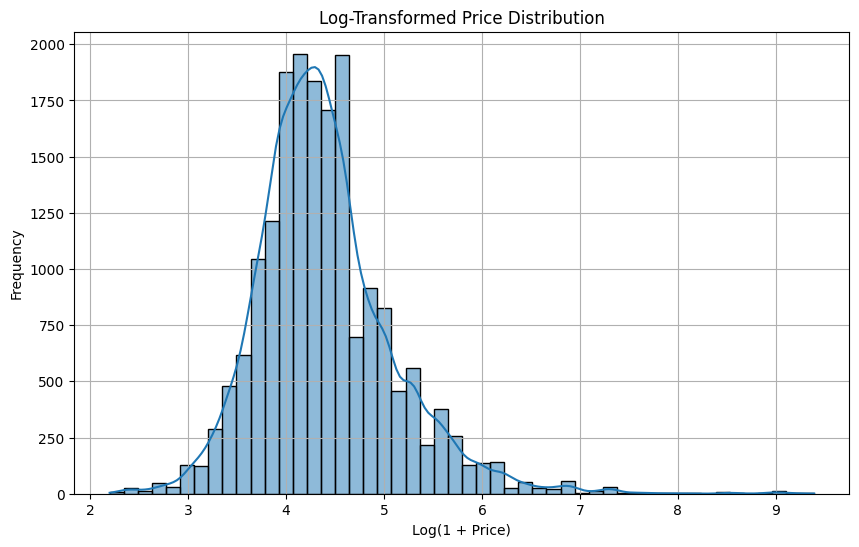

In [25]:
# log scale to check if prices are skewed
plt.figure(figsize=(10, 6))
sb.histplot(np.log1p(df["price"]), kde=True, bins=50)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(1 + Price)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#### Feature Scalling


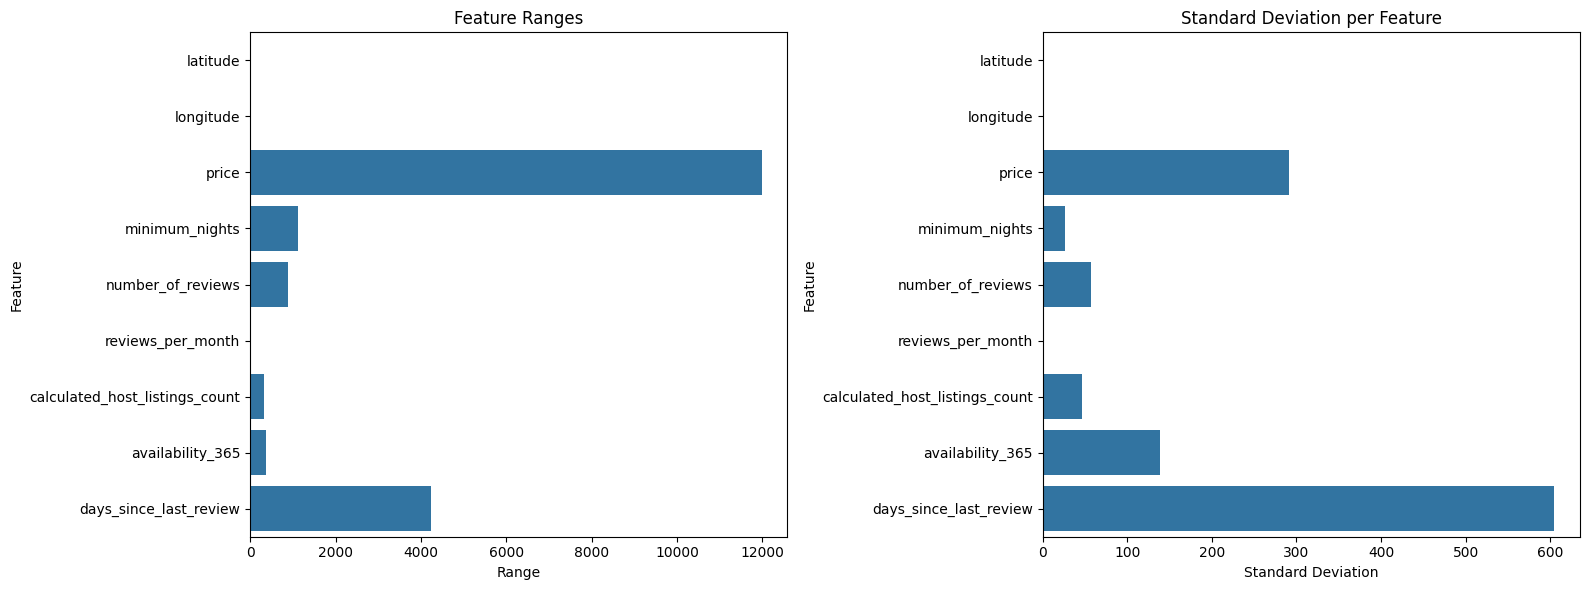

In [26]:
# collect scaling data
scaling_data = {
    "Feature": [],
    "Range": [],
    "Standard Deviation": []
}

for col in num_vars_relevant_univar:
    feature_range = df[col].max() - df[col].min()
    std_dev = df[col].std()
    scaling_data["Feature"].append(col)
    scaling_data["Range"].append(feature_range)
    scaling_data["Standard Deviation"].append(std_dev)

scaling_df = pd.DataFrame(scaling_data)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sb.barplot(data=scaling_df, x="Range", y="Feature", ax=ax[0])
ax[0].set_title("Feature Ranges")

sb.barplot(data=scaling_df, x="Standard Deviation", y="Feature", ax=ax[1])
ax[1].set_title("Standard Deviation per Feature")

plt.tight_layout()
plt.show()


### 4.1.3 Detailed analysis of specific features

#### host_id

In this section, we explore the `host_id` variable to understand how many listings are managed by each host. This can reveal the presence of **professional hosts** - individuals or companies who manage multiple properties on Airbnb.

By identifying the top hosts and analyzing the distribution of listings per host, we can gain insight into the structure of the Airbnb market in Milan and how centralized it is among a few active hosts. Hosts with a large number of listings may follow different pricing or availability strategies than individual hosts, and this may affect the overall market dynamics.

We will:
- Count how many listings each host has.
- Visualize the distribution of listings per host.
- Highlight the top 10–20 hosts by number of listings.
- Identify all hosts with more than **N listings**, to assess professional activity.

##### Distribution of Listings per Host

We first compute the number of listings per host and examine the overall distribution. Most hosts manage only a few listings, while a smaller number operate many listings, potentially indicating professional property managers.

In [27]:
# calculate
listing_counts = df['calculated_host_listings_count'] # listings per host

# basic stats
print("Total number of unique hosts:", df['host_id'].nunique())
print("Average number of listings per host:", listing_counts.mean())
print("Median number of listings per host:", listing_counts.median())

Total number of unique hosts: 12213
Average number of listings per host: 14.42189717279773
Median number of listings per host: 1.0


There are 12,213 unique hosts in the dataset.
The median number of listings per host is 1, meaning most hosts manage only one property.
The average is much higher (around 14.4), which means a few hosts have a lot of listings.
This shows a skewed distribution and suggests the presence of professional hosts or agencies.
To better understand this, we should check how many hosts have more than a certain number of listings (e.g. 20+) and explore their characteristics.

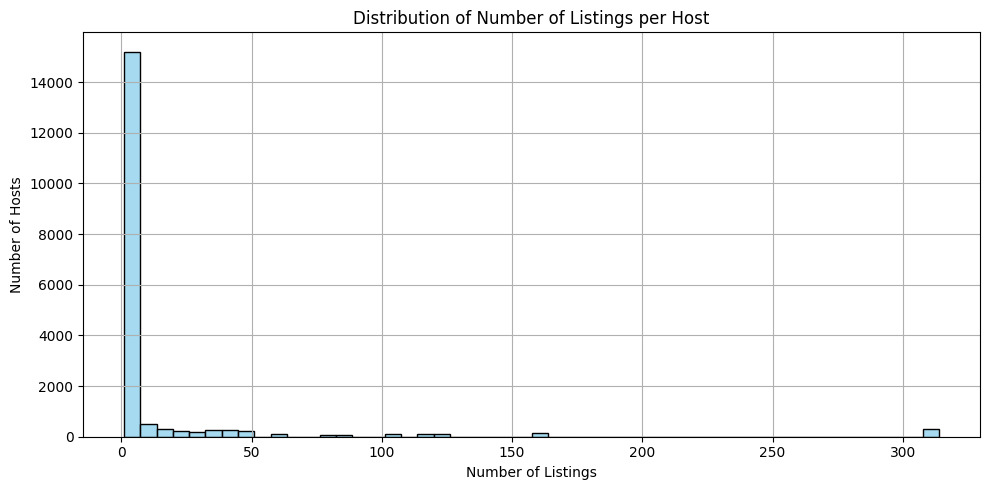

In [28]:
# distribution of listing counts per host
plt.figure(figsize=(10, 5))
sb.histplot(listing_counts, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Listings per Host")
plt.xlabel("Number of Listings")
plt.ylabel("Number of Hosts")
plt.grid(True)
plt.tight_layout()
plt.show()

Now, we want to see the top 20 hosts by number of listings. A high number of properties would likely indicate professional property managers rather than individual homeowners.

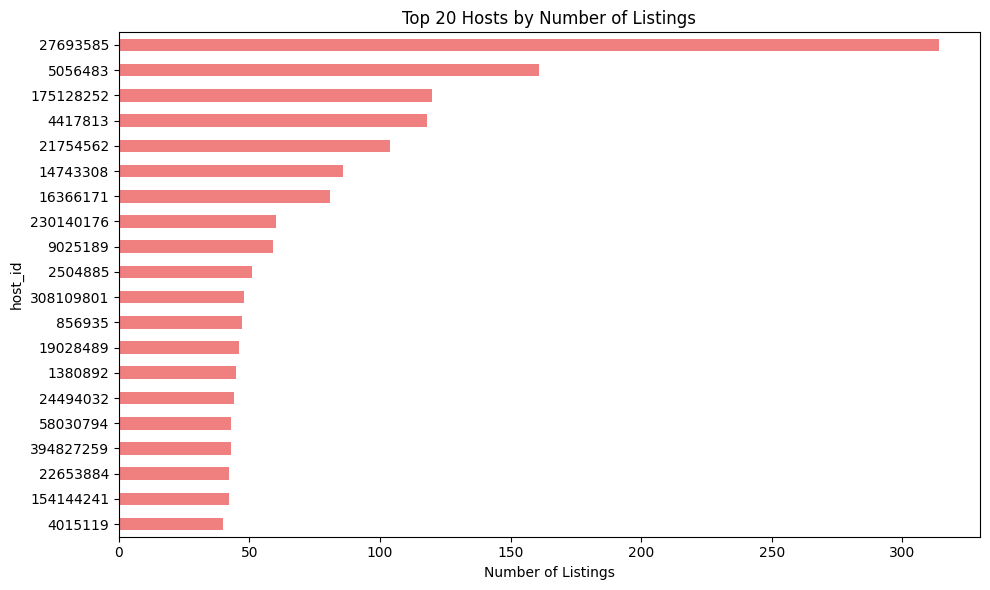

Top 20 hosts by number of listings:
host_id
27693585     314
5056483      161
175128252    120
4417813      118
21754562     104
14743308      86
16366171      81
230140176     60
9025189       59
2504885       51
308109801     48
856935        47
19028489      46
1380892       45
24494032      44
58030794      43
394827259     43
22653884      42
154144241     42
4015119       40
Name: count, dtype: int64


In [29]:
# top 20 hosts by number of listings (use host_id for this)
host_listing_counts = df['host_id'].value_counts()
top_20_hosts = host_listing_counts.head(20)

# plot
plt.figure(figsize=(10, 6))
top_20_hosts.plot(kind='barh', color='lightcoral')
plt.xlabel("Number of Listings")
plt.title("Top 20 Hosts by Number of Listings")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# raw values
print("Top 20 hosts by number of listings:")
print(top_20_hosts)

Some hosts manage a very large number of listings.  
For example, the top host has 314 listings, and many others have more than 40.  
These are likely professional hosts or property managers.

This could be useful to keep in mind later in the analysis. Hosts with many listings might have different pricing strategies.

#### minimum_nights

In this section, we analyze the `minimum_nights` variable, which will later guide our feature selection and feature engineering.
We want to look at the counts of minimum_nights across different ranges, ie. to see what number of airbnbs require a minimum night stay in specific ranges.

In [30]:
# custom ranges
min_night_bins = pd.cut(
    df['minimum_nights'],
    bins=[0, 2, 6, 13, 29, 90, 365, df['minimum_nights'].max()],
    labels=['1-2', '3-6', '7-13', '14-29', '30-90', '91-365', '366+']
)
min_night_counts = min_night_bins.value_counts().sort_index()
print("Minimum Nights Range Counts:")
print(min_night_counts)

Minimum Nights Range Counts:
minimum_nights
1-2       12780
3-6        3666
7-13        652
14-29       521
30-90       528
91-365      170
366+          5
Name: count, dtype: int64


The vast majority of listings (around 70%) require only 1–2 nights as a minimum stay, indicating high flexibility. As seen in previous section, the mode of `min_nights` is 1, indicating that the most frequent minimum nights requirement is 1.

Around 20% listings require between 3 and 6 days, while only ~10% of listings require 7 nights or more.
These longer minimum stays may indicate hosts targeting long-term tenants, which could influence pricing strategies and listing availability.

#### availability_365

As seen in previous section:

- The mean availability is 153.5 days, while the median is 123 days, indicating a slight right skew in the distribution.
- The mode is 0, meaning a significant number of listings are not available at all during the year.
- The standard deviation is 138.8, showing a wide spread in listing availabilities, ranging from 0 to 365 days.

As visualized in the histogram:
- There is a large spike at 0, suggesting many listings are inactive or only seasonally available.
- A substantial cluster near 365 days shows that many listings are available year-round.
- In fact, 5742 listings (around 30 percent of the dataset) are available for 250 days or more, potentially representing full-time rental properties.

This variability in availability may reflect different host types (e.g., occasional vs. professional hosts) or seasonal business strategies, and could have predictive value for modeling price.

Listings with availability >= 250 days: 5742


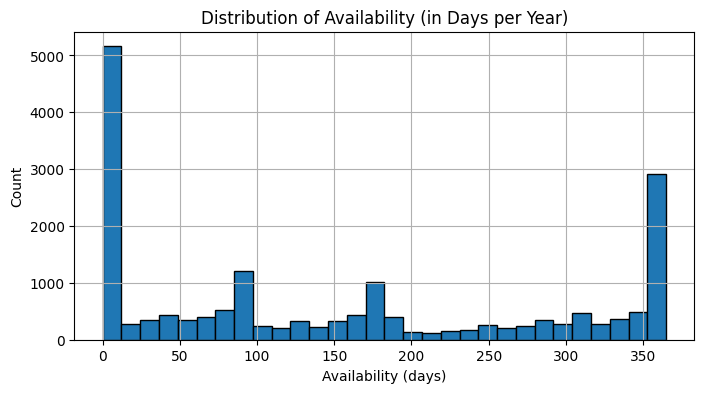

In [31]:
# availability - threshold counts
high_avail_count = (df['availability_365'] >= 250).sum()
print(f"Listings with availability >= 250 days: {high_avail_count}")

# availability - histogram
plt.figure(figsize=(8, 4))
df['availability_365'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Availability (in Days per Year)')
plt.xlabel('Availability (days)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### 4.1.4 Anomaly Detection : Outliers analysis

Outliers can significantly affect the analysis and modeling of data, especially when the target variable (`price`) has a long-tailed distribution. In this section, we aim to detect, quantify, and explore the price outliers using the standard IQR (Interquartile Range) method.

First, we will compute the upper bound threshold beyond which a listing is considered a price outlier. Then, we will analyze how many such listings exist and what proportion of the total they represent. Finally, we will explore the characteristics of these outlier listings—particularly which `neighbourhoods` and `room_types` are most represented among them. This analysis can help us understand whether certain types of listings disproportionately contribute to price anomalies.

#### General statistics about outliers

Since price cannot be negative and the main concern is extremely high-priced listings, we focus only on the upper bound of price for outlier detection.

In [32]:
# get quantiles from already computed num_summary for resource efficiency
Q1_price = num_summary['price']['25%']
Q3_price = num_summary['price']['75%']
IQR_price = Q3_price - Q1_price

# determine outlier threshold
upper_bound_price = Q3_price + 1.5 * IQR_price

# display the cutoff price
print(f"Outliers are listings with price > {upper_bound_price:.2f}")

Outliers are listings with price > 200.00


In [33]:
# count outliers
outliers_price = df[df['price'] > upper_bound_price]
n_outliers_price = len(outliers_price)

# total listings
n_total = len(df)

# percentage
outlier_percentage_price = (n_outliers_price / n_total) * 100

print(f"Number of outliers for price: {n_outliers_price}")
print(f"Percentage of listings that are outliers: {outlier_percentage_price:.2f}%")

Number of outliers for price: 1595
Percentage of listings that are outliers: 8.71%


With around 8.71% of listings falling into the outlier category, the proportion is non-negligible and could significantly impact our predictive models in the following sections if not handled properly.

#### Descriptive statistics of outliers
We now inspect the descriptive statistics of the price outliers to better understand their distribution and how extreme these values are.

In [34]:
print("Summary statistics for price outliers:")
print(outliers_price['price'].describe())

Summary statistics for price outliers:
count     1595.00000
mean       500.63511
std        889.80139
min        201.00000
25%        250.00000
50%        300.00000
75%        450.00000
max      11999.00000
Name: price, dtype: float64


#### Distribution of Price Outliers Across Neighborhoods and Room Types
We now examine where the price outliers are concentrated, both in terms of `neighbourhood` and `room_type`. This can help us identify if specific areas or types of listings (e.g., entire apartments vs. shared rooms) are more likely to have extremely high prices.

In [35]:
# top neighborhoods
neigh_counts = outliers_price['neighbourhood'].value_counts()
neigh_props = neigh_counts / n_outliers_price

top_neigh_df = pd.DataFrame({
    'count': neigh_counts,
    'proportion': neigh_props
}).head(10)

# room types
room_counts = outliers_price['room_type'].value_counts()
room_props = room_counts / n_outliers_price

room_df = pd.DataFrame({
    'count': room_counts,
    'proportion': room_props
})


In [36]:
print("Top 10 neighborhoods among price outliers:")
display(top_neigh_df)

Top 10 neighborhoods among price outliers:


count  proportion
neighbourhood                            
DUOMO                     195    0.122257
BRERA                     149    0.093417
BUENOS AIRES - VENEZIA     98    0.061442
NAVIGLI                    95    0.059561
TICINESE                   79    0.049530
SARPI                      73    0.045768
CENTRALE                   66    0.041379
MAGENTA - S. VITTORE       65    0.040752
ISOLA                      65    0.040752
GUASTALLA                  57    0.035737

In [37]:
print("Room type distribution among price outliers:")
display(room_df)

Room type distribution among price outliers:


count  proportion
room_type                         
Entire home/apt   1359    0.852038
Private room       216    0.135423
Hotel room          14    0.008777
Shared room          6    0.003762

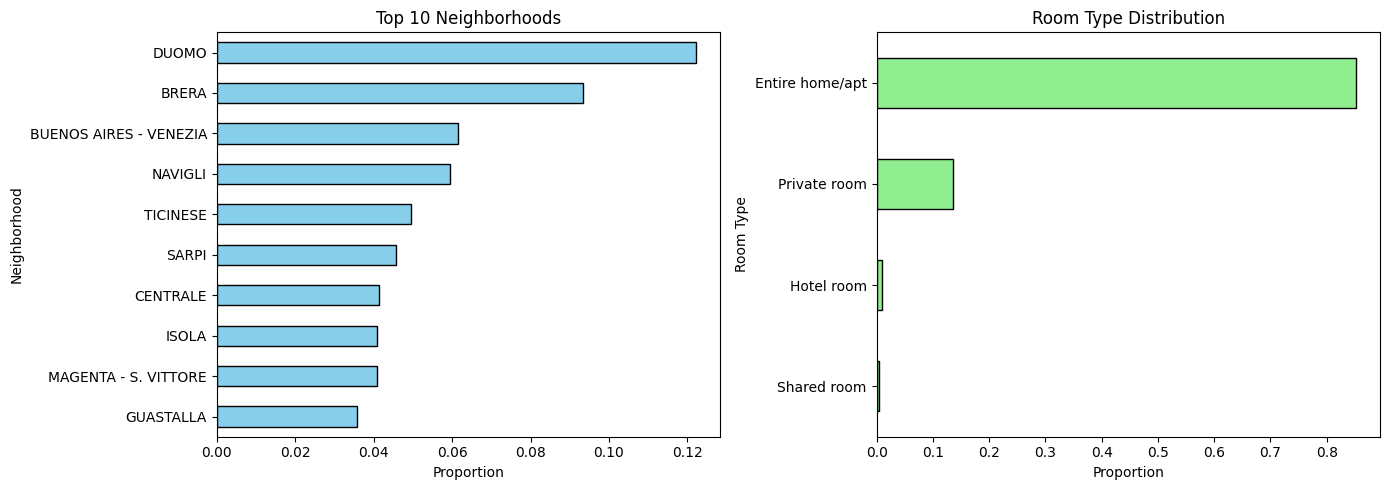

In [38]:
# plot both
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# neighborhood plot
top_neigh_df['proportion'].sort_values().plot(kind='barh', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title("Top 10 Neighborhoods")
axes[0].set_xlabel("Proportion")
axes[0].set_ylabel("Neighborhood")

# room type plot
room_df['proportion'].sort_values().plot(kind='barh', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title("Room Type Distribution")
axes[1].set_xlabel("Proportion")
axes[1].set_ylabel("Room Type")

plt.tight_layout()
plt.show()

The majority of price outliers correspond to listings that are `Entire home/apt` (1359 listings, 85.2%) and `Private room` (216 listings, 13.5%). In contrast, `Hotel room` (14 listings, 0.88%) and especially `Shared room` (6 listings, 0.38%) are almost never outliers. This suggests that extremely high-priced listings are most often full apartments or private accommodations, likely targeting tourists or high-end travelers — in other words, luxury listings.

From a geographical perspective, price outliers are concentrated in the most popular and upscale neighborhoods of Milan. The top three are:
- `DUOMO` (195 listings, 12.2%)
- `BRERA` (149 listings, 9.3%)
- `BUENOS AIRES - VENEZIA` (98 listings, 6.1%)

Other central and lively neighborhoods like `NAVIGLI`, `TICINESE`, and `SARPI` also have a significant share of high-priced listings. This confirms that luxury and high-demand areas tend to drive price extremes in the dataset.

#### Availability comparison between outliers and non-outliers

In [39]:
outliers_price = df[df['price'] > upper_bound_price]
non_outliers_price = df[df['price'] <= upper_bound_price]


Availability (non-outliers):
count    16727.000000
mean       152.768877
std        138.217577
min          0.000000
25%          1.000000
50%        122.000000
75%        299.000000
max        365.000000
Name: availability_365, dtype: float64

Availability (outliers):
count    1595.000000
mean      161.266458
std       144.112178
min         0.000000
25%         0.000000
50%       131.000000
75%       332.500000
max       365.000000
Name: availability_365, dtype: float64


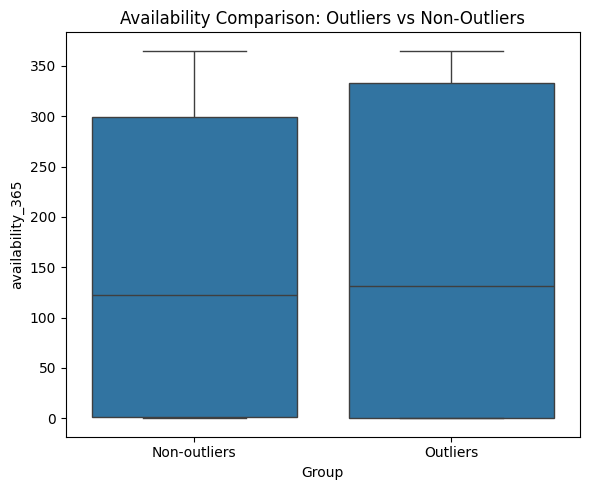

In [40]:
# Summary stats
print("Availability (non-outliers):")
print(non_outliers_price['availability_365'].describe())
print("\nAvailability (outliers):")
print(outliers_price['availability_365'].describe())

# Boxplot
plt.figure(figsize=(6, 5))
sb.boxplot(data=df, x=df['price'] > upper_bound_price, y='availability_365')
plt.xticks([0, 1], ['Non-outliers', 'Outliers'])
plt.xlabel('Group')
plt.title('Availability Comparison: Outliers vs Non-Outliers')
plt.tight_layout()
plt.show()


The comparison of `availability_365` between outlier and non-outlier listings does not reveal a substantial difference. While outliers have slightly higher availability on average, this difference is small and could be attributed to noise or natural variability in the data. Overall, there does not appear to be a strong or consistent relationship between availability and price level, suggesting that being available year-round does not necessarily imply a higher price.

#### Top 10 hosts with most price outliers
In this section, we examine whether certain hosts are responsible for a large number of high-priced listings. Identifying hosts with many outlier listings can reveal whether some individuals consistently operate luxury Airbnb properties. This may indicate professional hosts who specialize in high-end accommodations or manage multiple expensive listings.

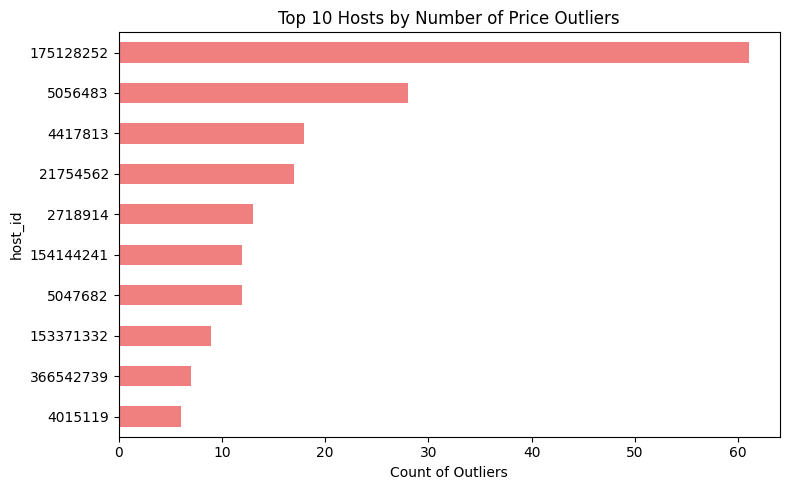

host_id
175128252    61
5056483      28
4417813      18
21754562     17
2718914      13
154144241    12
5047682      12
153371332     9
366542739     7
4015119       6
Name: count, dtype: int64


In [41]:
top_hosts_outliers = outliers_price['host_id'].value_counts().head(10)

# plot
plt.figure(figsize=(8, 5))
top_hosts_outliers.plot(kind='barh', color='lightcoral')
plt.xlabel('Count of Outliers')
plt.title('Top 10 Hosts by Number of Price Outliers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# print values
print(top_hosts_outliers)


The results show that a few hosts are responsible for a significant number of high-priced listings. For example, the top host (`host_id` 175128252) alone has 61 outlier listings, while several others have between 6 and 28 each. This suggests that these hosts likely manage multiple luxury or premium properties on the platform, potentially operating as professional Airbnb hosts or property management companies. The presence of such hosts highlights a concentration of high-end listings among a small number of users.

We should take this into account in the next steps of our analysis - if we decide to include the outliers in our training data, it could be possible that `host_id` is a valuable predictor of price, given that some specific hosts specialise in luxury listings.
If we decide to drop the outliers, we would still have to analyse whether `host_id` could be a valuable predictor of price and whether there are hosts that manage a large number of airbnbs.

### 4.1.5. Categorial variables

In [42]:
cat_vars_relevant_univar

['neighbourhood', 'room_type']

We only have two 'relevant' categorical variables, so instead of using a for-loop to generate the barplots to see the counts across categories, we will do it sequentially. This will allow is to customize the settings for each plot (e.g. dimensions), since `neighbourhood` has a lot more categories than `room_type`.

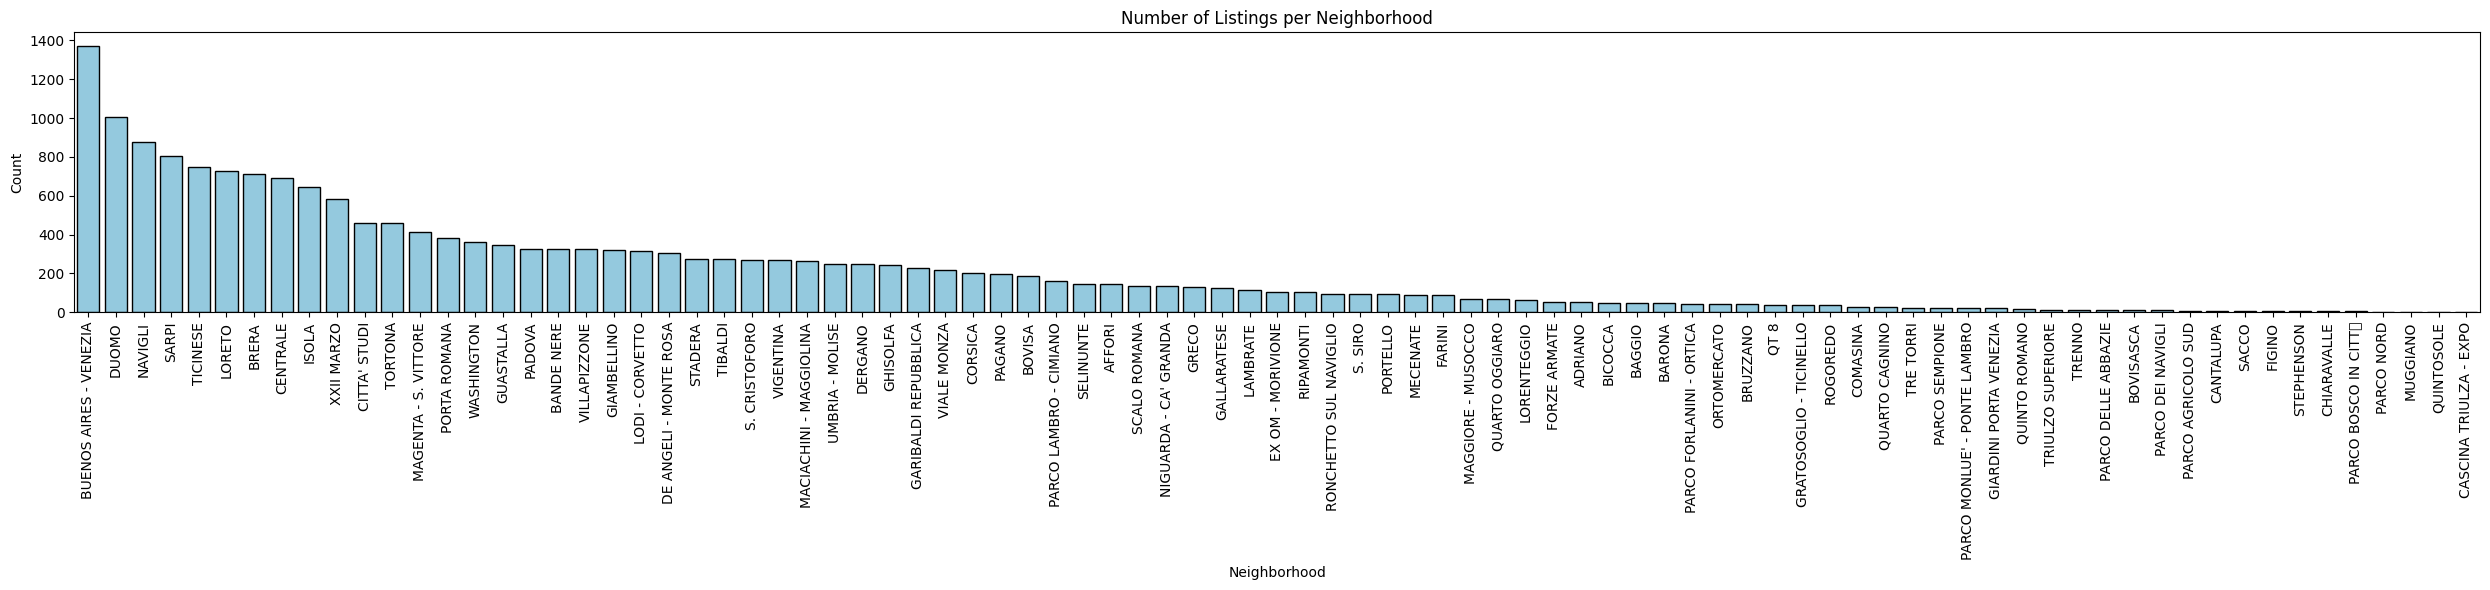

In [43]:
# wide horizontal barplot for neighbourhood (sorted by count)
plt.figure(figsize=(25, 6))  
neigh_counts = df['neighbourhood'].value_counts()

sb.barplot(x=neigh_counts.index, y=neigh_counts.values, color='skyblue', edgecolor='black')
plt.title("Number of Listings per Neighborhood")
plt.ylabel("Count")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Room type counts:
room_type
Entire home/apt    13605
Private room        4376
Shared room          267
Hotel room            74
Name: count, dtype: int64


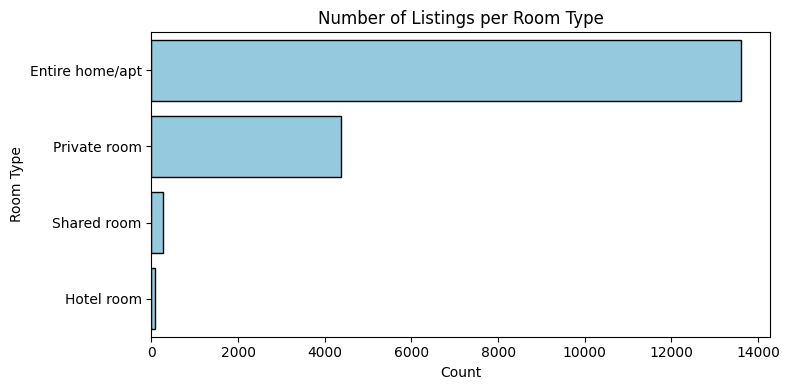

In [44]:
# value counts for room_type
room_counts = df['room_type'].value_counts()

print("Room type counts:")
print(room_counts)

# horizontal barplot
plt.figure(figsize=(8, 4))
sb.barplot(x=room_counts.values, y=room_counts.index, color='skyblue', edgecolor='black')
plt.title("Number of Listings per Room Type")
plt.xlabel("Count")
plt.ylabel("Room Type")
plt.tight_layout()
plt.show()


We can see that most of the listings are entire homes/apartments and private rooms.
There are way less hotel rooms and shared rooms.

### 4.1.6 Univariate analysis conclusion

#### Price  
- **Skewness:** The price distribution is **highly positively skewed**. Most Airbnb listings have relatively low nightly rates, with a long tail extending toward very high prices. This skewness is evident from the histogram clustering at lower prices and a few bars stretching far to the right.  

- **Outliers:** There are numerous outliers on the high end. The boxplot for price shows many individual points beyond the upper whisker, confirming **extreme high-price outliers**. The maximum price in the dataset is €11,999, which is extraordinarily high compared to typical listings and indicates the presence of luxury or anomalous listings.  

- **Central Tendency:** The **mean price (~€115)** is much higher than the **median price (~€74)** due to the right skew. This indicates that a few expensive listings raise the average. The **mode** (most common price) is around €50, suggesting many budget-friendly listings. In summary, a majority of listings are in the two-digit price range, while a minority of listings at very high prices pull the mean upward. 

- **Spread/Variability:** Price has a **wide spread**. The standard deviation is about €290, reflecting high variability. Prices range from a minimum of €8 to a maximum of €11,999, demonstrating an extremely broad range. Such a large range implies diverse property types (from low-cost rooms to expensive villas). The interquartile range is much narrower (50% of listings between €50 and €110), with values beyond this range considered outliers.  

- **Distribution Commentary:** The distribution shows that the **Milan Airbnb market is heterogeneous**. Many listings cluster in an affordable range, but there is a significant tail of high-priced properties. This could reflect high-end luxury apartments or large properties that command premium rates, as well as possible data errors. The presence of so many zero or low-frequency counts at high prices in the histogram highlights that these expensive listings are rare.  

- **Feature Scaling:** Due to the magnitude differences (some prices are two orders of magnitude larger than others), **feature scaling is important**. A log transformation of price could be helpful to reduce skewness and make the distribution more symmetric for modeling. Additionally, normalization or standardization would ensure that the price range (which can dominate because it spans up to 11999) does not unduly influence algorithms compared to other features.



#### Minimum Nights
- **Skewness**: The minimum_nights distribution is also positively skewed. Most listings have very low minimum stay requirements, but a small number have extremely large minimum nights. This is seen in the histogram with a concentration at 1-3 nights and a long tail stretching to very high values.

- **Outliers**: There are clear outliers for minimum nights. The maximum value is 1124 nights (over three years), which is far above typical requirements. The boxplot shows points far beyond the upper whisker, confirming that a few listings require unusually long minimum stays. These outliers might be special cases like long-term rentals or simply data anomalies.

- **Central Tendency**: The median minimum nights is 2, and the mean is ~5.8, indicating that most hosts allow short stays (1 or 2 nights are very common, as the mode is 1 night). The mean being higher than the median reflects the influence of the few very large values. Most travelers in Milan can book a place for just a couple of nights, as evidenced by the low median.

- **Spread/Variability**: The variability in minimum_nights is large relative to its center. The standard deviation (~26.7 nights) is quite high, again due to extreme values. The range spans from 1 night to 1124 nights, though 75% of listings require 3 nights or fewer. This means the typical spread is low (1 to 3 nights for most listings), with a handful of exceptionally high values creating a long tail.

- **Distribution Commentary**: The vast majority of listings have minimal stay requirements between 1 and a few nights, which is standard for Airbnb. The few listings with very high minimum stays could indicate long-term rental offerings (e.g., requiring a stay of months) or possibly hosts who prefer longer commitments. Such listings are rare in comparison to the whole market. The histogram likely shows a huge spike at 1 night and rapidly diminishing frequencies for higher nights.

- **Feature Scaling**: minimum_nights has a different scale (up to 1124) compared to variables like reviews or availability. For modeling, this feature should be scaled (e.g., normalized) to prevent the large values from dominating. Also, one might consider capping this feature or using a logarithmic scale due to its skewness; this would reduce the impact of extreme outliers on analyses and models.

#### Number of Reviews
- **Skewness**: The number_of_reviews is highly skewed to the right. Most Airbnb listings have only a handful of reviews, and a substantial portion have no reviews at all. The histogram shows a spike at zero (since many listings are new or not frequently booked) and a long tail towards high review counts.

- **Outliers**: There are listings with an exceptionally large number of reviews, up to 896 reviews for a single property. These are outliers in the context of the whole dataset. In the boxplot, many points lie beyond the upper whisker, representing listings that have garnered far more reviews than the typical listing.

- **Central Tendency**: The median number of reviews is 3, which indicates that at least half of the listings have three or fewer reviews. The mean is ~23.7, higher than the median because of the influence of popular listings with a high review count. The mode is 0 (zero reviews is the most common case), reflecting that many listings have not been reviewed yet (possibly recent listings or those with no bookings through Airbnb).

- **Spread/Variability**: There is a wide variability in the number of reviews. The standard deviation (~57.7 reviews) is more than double the mean, underlining a high dispersion. The range is from 0 to 896 reviews. While most properties have only a few reviews, a small set of properties have amassed hundreds of reviews, indicating they are very popular or long-standing. The interquartile range is relatively low (0 to 19 reviews for 25th to 75th percentile), so most variability comes from the upper tail outliers.

- **Distribution Commentary**: This distribution suggests a large disparity in listing popularity or tenure on Airbnb. Many listings are either new or infrequently booked (hence few reviews), whereas a few are highly popular (with many reviews). This could be seasonal apartments or top listings with consistent bookings over years. The fact that 25% of listings have 0 reviews highlights a churn of new hosts or listings that might not get bookings.

- **Feature Scaling**: While number_of_reviews is on a smaller scale than price, it still benefits from scaling due to its range up to 896. In predictive modeling, it might be useful to log-transform this feature to compress the long tail of high values and reduce skewness. Additionally, since many values are 0, adding a small constant before log (e.g., log(1 + reviews)) can handle the zeros. At minimum, normalization will ensure this count-based feature is comparable to others in magnitude.

#### Reviews per Month
- **Skewness**: The reviews_per_month distribution is right-skewed with a majority of listings having very low values. A large number of properties receive almost no monthly reviews – many have a value of 0 (especially those with no bookings or new listings). The histogram likely has a spike near 0 and a tail extending rightwards to higher review frequencies.

- **Outliers**: Some listings receive a high number of reviews each month (up to about 13.7 reviews/month). These are outliers, indicating extremely frequently booked listings. In a boxplot, these high values would appear as points beyond the typical range, as most listings have less than 1 review per month on average.

- **Central Tendency**: The median reviews_per_month is ~0.31, meaning that half of the listings get roughly one review every three months or less. The mean is ~0.80, which is higher than the median due to those few high-activity listings. There is no single prominent mode aside from the concentration at 0 (if we consider 0 values, that would be the most common case since many listings have essentially 0 monthly reviews). This emphasizes that the typical listing isn’t reviewed every month.

- **Spread/Variability**: The range of reviews_per_month goes from 0.01 to 13.71. While this is a much smaller absolute range than other variables, relative to its median it’s quite wide (covering listings that rarely get booked up to those booked multiple times a week). The standard deviation (~1.22) is moderate, but the distribution’s variability is primarily in the lower end (0 to 1 review per month for most listings). The interquartile range is 0.1 to 0.99, showing that 75% of listings get less than about 1 review per month. Only the top few percent of listings have several reviews each month.

- **Distribution Commentary**: This indicates that most Milan Airbnb listings are infrequently reviewed, likely due to either low booking frequency or being newer listings. A small fraction of listings are very active (multiple reviews each month), which could correspond to highly popular stays or those in constant use. The high concentration of near-zero values suggests a lot of hosts do not get steady monthly bookings via Airbnb.

- **Feature Scaling**: The scale of reviews_per_month is relatively low (usually between 0 and 1 for many listings, with a few up to ~14). Even so, scaling helps when comparing with other features (like price or availability). A log transformation isn’t as commonly needed here because values are already small, but could be used to distinguish 0 vs non-0 better (though one must handle zeros appropriately). Generally, normalizing this feature will ensure that its range (which is tighter) doesn’t get washed out or, conversely, that the outliers don’t overly influence a model. Also, since this feature has missing values for listings with no reviews, those would need to be handled (e.g., treating missing as 0 in context of reviews per month).



#### Host Listings Count
- **Skewness**: The calculated_host_listings_count (number of listings per host) is extremely right-skewed. Most hosts have only one listing, and the frequency drops off sharply for higher counts. There is a long tail representing hosts with many listings.

- **Outliers**: There are significant outliers in this distribution. While the bulk of hosts manage 1 property, some hosts manage dozens or even a few hundred properties (the maximum is 314 listings by one host). These high values are outliers, which would appear as isolated points on the upper end of a boxplot.

- **Central Tendency**: The median host listing count is 1, indicating that over half of the hosts have a single listing (which is typical for Airbnb). The mean (~14.4) is much higher, pulled up by the few hosts with very large portfolios. The mode is also 1 (the most common value). Essentially, the typical host is an individual with one property, but a small number of “professional” hosts have many listings each.

- **Spread/Variability**: The spread is very broad due to outliers. The standard deviation (~46.3) is high relative to the median because of the presence of hosts with up to 314 listings. The range is from 1 to 314. However, the interquartile range is small (1 to 4), showing that 75% of hosts have no more than 4 listings. This contrast between the IQR and the full range highlights how unusual the high-count hosts are.

- **Distribution Commentary**: The distribution suggests a dual nature of hosts on Airbnb Milan: the majority are casual hosts with one property, while a minority are likely property managers or businesses with a large number of listings. This can have implications for the market (e.g., professional hosts might have different pricing strategies). The histogram would have a spike at 1 and then trail off; many bins after 1 might have very low frequencies, except possibly small bumps at certain counts if some property managers have similar counts.

- **Feature Scaling**: This feature’s scale (1 to 314) is quite different from others and has extreme outliers. For modeling, normalization is necessary so that this count (which can be large) doesn’t overshadow other features. A log transformation could also be considered to compress the high end of the distribution. In some cases, one might even cap the maximum value or treat hosts with very high counts as a separate category (if doing categorical analysis), but purely on scaling terms, bringing it to a similar range as other features is important.

#### Availability (365 days)
- **Skewness**: The availability_365 distribution is bimodal or at least highly variable rather than strictly skewed. There are two notable groups of listings: those with 0 days available (fully unavailable) and those with 365 days available (available year-round). Many other listings are spread between 1 and 364 days of availability, but the extremes are prominent. The histogram may show a concentration at 0, another around 365, and a more uniform spread in between, indicating partial availability for others.

- **Outliers**: Since availability is bounded between 0 and 365, values at the extremes (0 or 365) could be seen as outliers in context, though they are valid values. The boxplot might flag 0 as a low-end outlier and 365 as a high-end outlier if using the 1.5*IQR rule because a large portion of data lies in between. However, these “outliers” are actually quite common and meaningful (inactive listings vs. always-available listings).

- **Central Tendency**: The median availability is 123 days, meaning half of the listings are available for about four months or less per year. The mean (~154 days) is higher, suggesting that more listings tend toward higher availability (which pulls the average up). There isn’t a single clear mode like other variables; instead, there are two frequent values: 0 and 365 (each of these occurs often as many hosts either don’t rent at all via Airbnb or keep their place listed year-round).

- **Spread/Variability**: The variability in availability is quite high (std ~138.8 days). This is expected given the near-uniform range from 0 to 365. The range is the full 0 to 365 days by definition. The interquartile range (0 to 302 days) is also wide, reflecting that even among the central 50% of listings, availability differs greatly. In fact, 25% of listings have zero availability (perhaps never rented or currently blocked), while 25% are available more than ~300 days. This wide spread indicates very different hosting patterns.

- **Distribution Commentary**: The pattern suggests a mix of fully active and mostly inactive listings. A significant subset of hosts might list their property but not actually rent it (0 available days, possibly an artifact of data collection or seasonal unavailability), while another subset is effectively always open for bookings. Those in between might be renting seasonally or have moderate availability. Such a distribution could affect how we interpret other variables; for example, listings with 0 availability likely also have 0 reviews (they might be dormant).

- **Feature Scaling**: Since availability_365 is on a 0-365 scale, it can be easily scaled down (for instance, dividing by 365 to get a fraction of the year). This normalization would put availability on a 0 to 1 range, comparable with other features. While the distribution is not as extremely skewed as price, scaling is still useful for algorithms to prevent a variable with a range in the hundreds from dominating others that range in tens or ones. One might also consider creating binary flags (e.g., available_all_year vs not) to capture the strong prevalence of 365-day availability as a special case, though strictly in terms of scaling, a simple normalization suffices.

## 4.2. Joint Distributions

To analyze relationships between different variables and price, we will:    
- Use the already created `num_vars` (or `num_vars_relevant`) and `cat_vars` lists, which contain all (relevant) numerical/categorical variables. 
- Exclude non-relevant variables such as `id` and `host_id`, as they do not provide meaningful insights into price.  
- Generate scatter plots to visualize trends and potential correlations. 
- Visualize the distribution of price along different categories of categorical variables via boxplots. 
- Compute and analyze the correlation matrix to quantify relationships between variables.

In [45]:
num_vars

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'days_since_last_review']

Looking at the variables (and the first 5 rows of the dataframe, check previous section), we notice immediately that it makes sense to exclude `id` and `host_id` from the list of numerical variables we want to use as predictors in our analysis, as they do not bring any potential insights into the price and are completely random.
So, we will proceed by excluding them from our list of variables. We also exclude `price` itself, as it is our target variable.

In [46]:
excluded_vars = ['id', 'host_id', 'price']
num_vars_relevant = [var for var in num_vars if var not in excluded_vars]

### 4.2.1. Scatter plots

In [47]:
# shape of relevant numerical variables
len(num_vars_relevant) # -> 4 rows, 2 columns

8

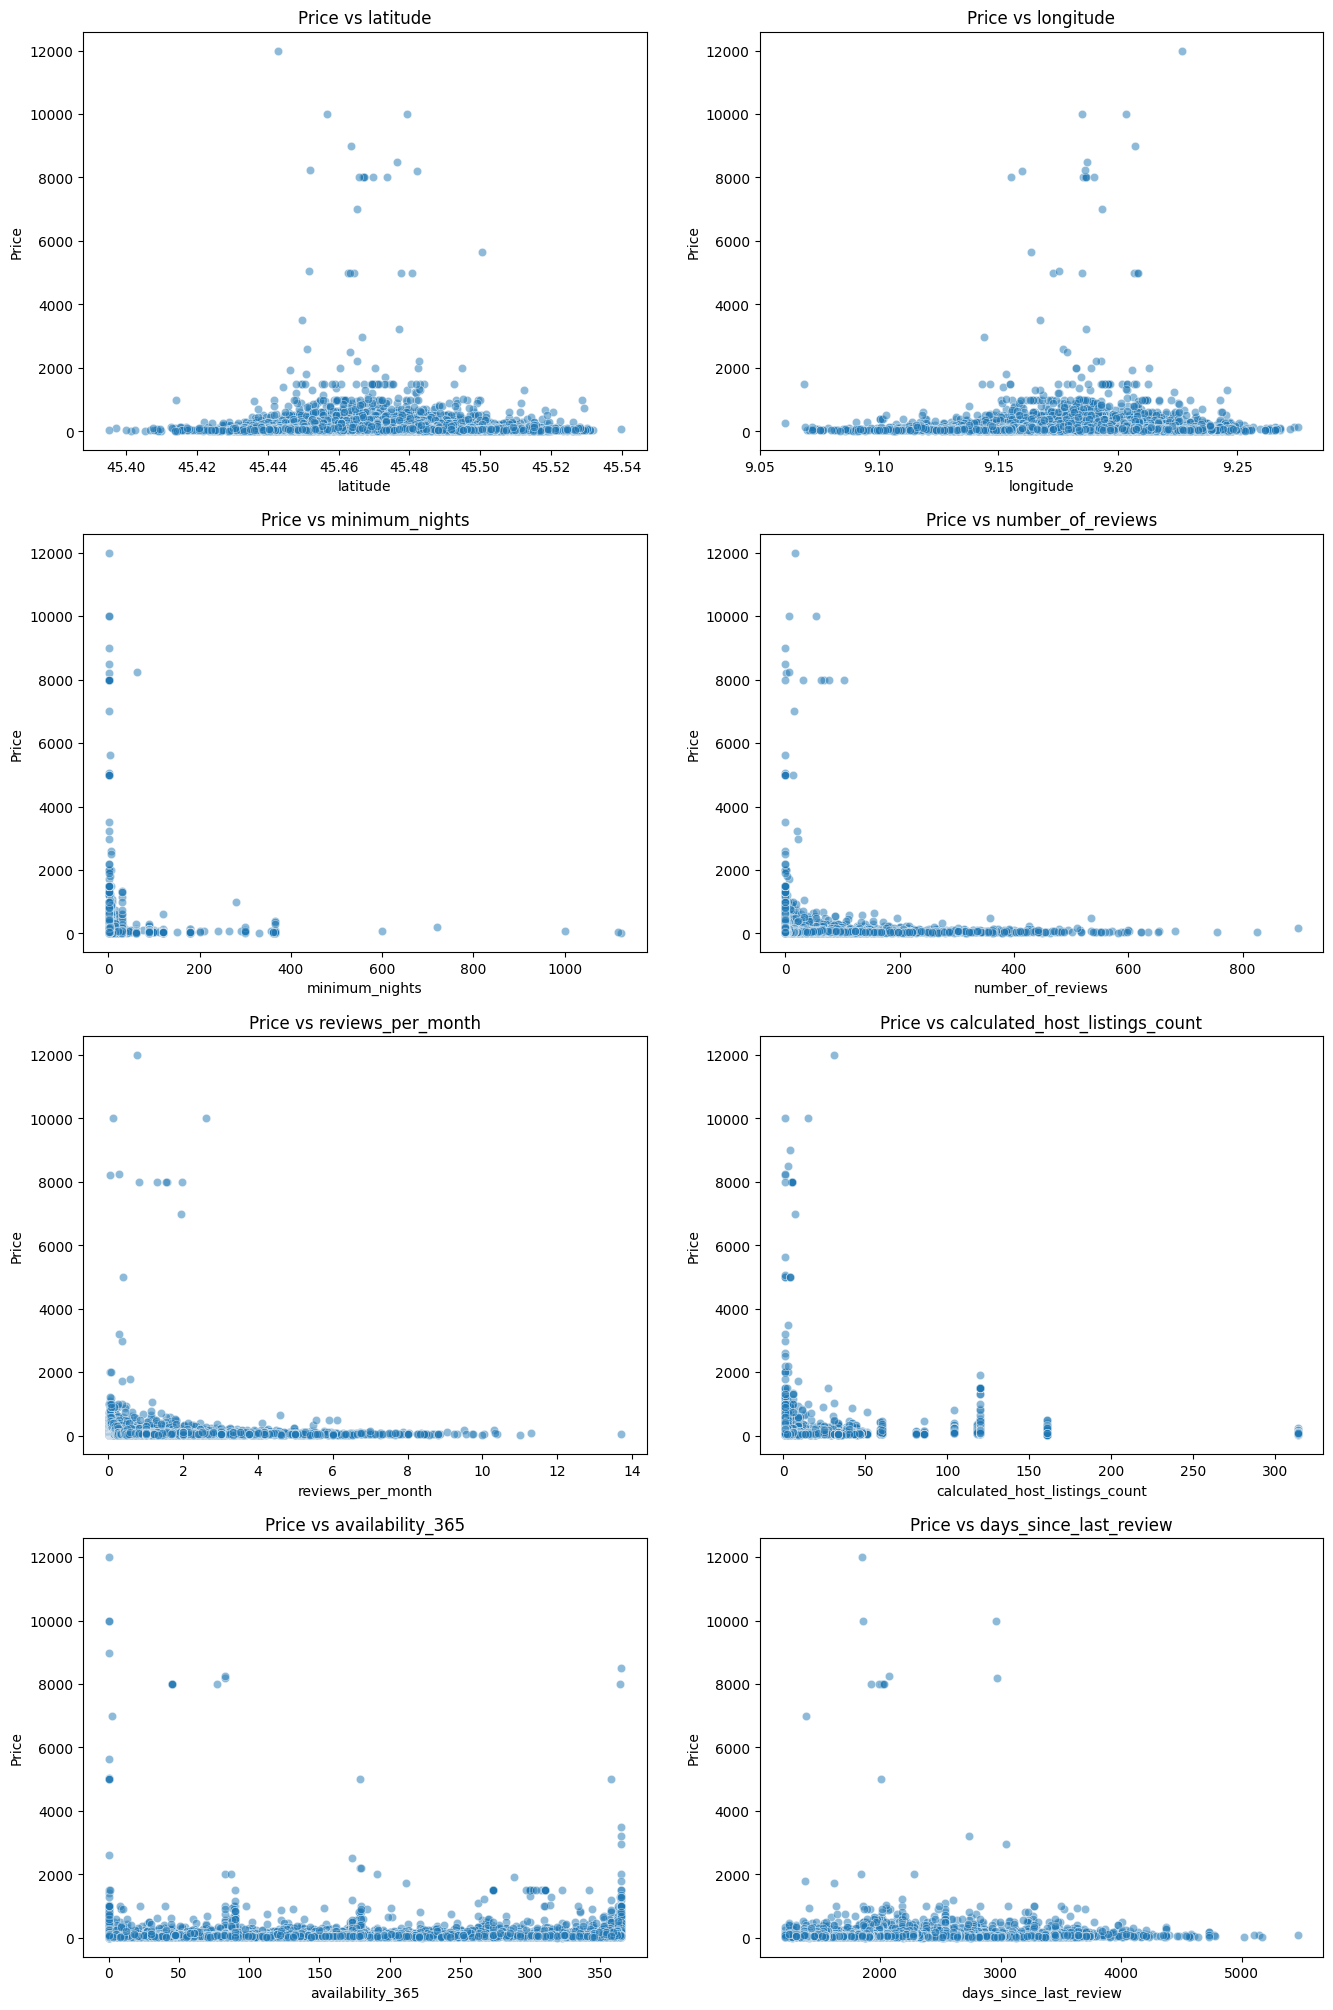

In [48]:
# generate scatter plots using a for-loop for resource efficiency
plt.figure(figsize = (16, 25))
for i, var in enumerate(num_vars_relevant,1) : # start enumerate from 1 not 0
    plt.subplot(4,2,i)
    sb.scatterplot(x=df[var],y=df['price'], alpha = 0.5)
    plt.title(f"Price vs {var}")
    plt.xlabel(f"{var}")
    plt.ylabel(f"Price")
plt.show()

#### Observations scatter plots : 
**Longitude and Latitude**:
- Price does **NOT** seem to have a strong correlation with longitude and latitude, as listings are fairly evenly distributed across the entire range of values. 
- However, the highest-priced listings appear to be somewhat clustered within the central range of both longitude and latitude, suggesting luxury rentals may be concentrated in specific neighborhoods in central Milan.  
- To better understand the relationship between price and location, further analysis using unsupervised learning and clustering techniques will be conducted in the next steps. 

**Minimum Nights**  
- Most listings have a low minimum nights value, indicating that short-term stays dominate.  
- However, there are extreme values with minimum stays exceeding 1000 nights, which are likely **outliers** and should be examined further.  
- The relationship between price and minimum nights does not show a clear trend, suggesting that pricing is not strongly dependent on minimum stay requirements.  

**Number of Reviews / Reviews per Month** 
- Most listings have a low number of reviews, with very few exceeding 200 reviews.  
- Higher-priced listings tend to have fewer reviews, which may indicate that expensive properties are booked less frequently.  
- Listings with many reviews are likely budget-friendly or high-turnover properties.  
- There is no clear correlation between price and number of reviews, suggesting that pricing does not significantly impact the likelihood of receiving reviews.  

**Host Listings Count**  
- Most hosts manage only a small number of properties, but a few operate over 300 listings, likely professional Airbnb hosts.  
- There is no clear relationship between the number of properties a host manages and price, meaning that professional hosts do not necessarily charge higher prices. We do not expect this variable to contribute significantly to our ML models.

**Availability_365** 
- Listings are clustered around 0 and 365, meaning that many properties are either always available or rarely available.  
- No strong pattern is observed between availability and price, indicating that how often a listing is available does not strongly impact its price. Therefore, we expect this variable to give us little to no insights into the price of an airbnb and to have low coefficients in our ML models.

**Days since last review** : 
- There is no clear trend between price and days since last review, suggesting that more recently reviewed listings are not necessarily more expensive or cheaper.  
- However, some high-priced listings appear across different values, indicating that expensive properties may receive reviews irregularly in a more random way rather than regularly.  
- Given the lack of a strong pattern, this variable may not be a key determinant of price but could still provide some insight into listing activity. 
- Again, we must remember that our dataset is not recent, thus why the most recent reviews are still around 4-years old.

### 4.2.2. Boxplots between categorical variables and price

In this step, we will proceed by visualizing the distubution of price along the different categories for our categorical (i.e. object) variables using boxplots.

We have five categorical variables in our dataset (stored in `car_vars` from a previous step) 
- `name` (Text-based, not useful for price prediction)  
- `host_name` (Not relevant for analysis)  
- `neighborhood` (Likely important, as location influences price)  
- `room_type` (Important, as different types of accommodations have different pricing)  
- `last_review` (Temporal, not useful for boxplots)  

Since `name`, `host_name`, and `last_review` are **not relevant** for price analysis, we will exclude them and proceed with `neighborhood` and `room_type`.  
 
Boxplots will help us visualize:  
- Median prices across categories
- Price variability within each category  
- Presence of outliers in each category 


In [49]:
cat_vars

['name', 'host_name', 'neighbourhood', 'room_type', 'last_review']

In [50]:
# keep only neighborhood and room_type
cat_vars_relevant = ['neighbourhood', 'room_type']

#### Price vs Neighbourhood

We first analyze price variation across Milan's 87 neighborhoods. To make the boxplots easier to interpret:
- We **sort neighborhoods** by their average price in descending order to visualize the most expensive areas first.
- We **split the neighborhoods into batches of 10** and generate separate subplots for each batch, which avoids overcrowding and improves readability.
- We define a plotting function for efficienct plotting.

In [51]:
# compute mean price per neighborhood and sort neighborhoods
neighborhood_means = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)
sorted_neighborhoods = neighborhood_means.index.tolist()

In [52]:
# function to plot boxplots in batches for better readability
def plot_boxplots(df, title):
    unique_neighborhoods = sorted_neighborhoods  # use sorted neighborhoods
    batch_size = 10  # number of neighborhoods per subplot
    num_batches = int(np.ceil(len(unique_neighborhoods) / batch_size))  # total number of subplots needed

    plt.figure(figsize=(10, num_batches * 5))  

    for i in range(num_batches):
        plt.subplot(num_batches, 1, i + 1)  
        selected_neighborhoods = unique_neighborhoods[i * batch_size : (i + 1) * batch_size]
        sb.boxplot(x=df[df["neighbourhood"].isin(selected_neighborhoods)]["neighbourhood"], 
                   y=df["price"])
        plt.xticks(rotation=45)
        plt.title(f"{title} (batch {i + 1})")
        plt.xlabel("neighbourhood")
        plt.ylabel("price")

    plt.tight_layout()
    plt.show()

We first generate the boxplots **with all data**, including price outliers. We will see this will cause a problem with visualizing many boxpots.

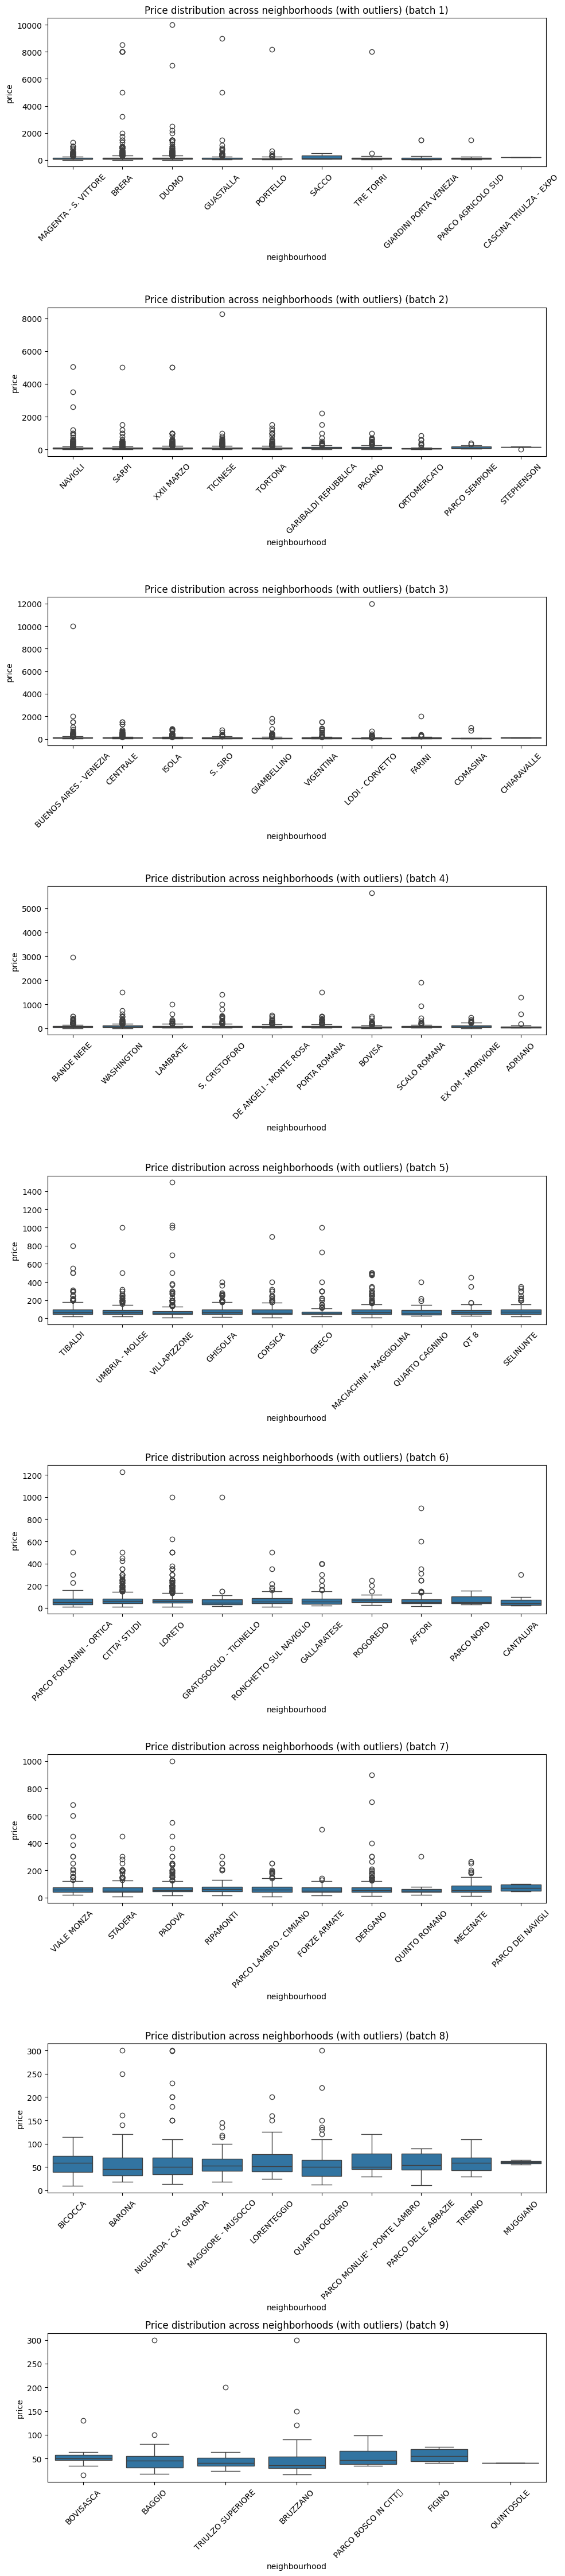

In [53]:
plot_boxplots(df, "Price distribution across neighborhoods (with outliers)")

These boxplots reveal that neighborhood has a strong influence on price. However, we also observe that the interquartile range (Q1–Q3) is **heavily compressed** due to extreme outliers—some listings exceed €10,000 per night, which distorts the main body of the plot and makes it difficult to compare neighborhoods.

To address this, we **remove the top outliers** using the IQR method (remove all listings with price >= Q1 + 1.5* IQR, previously determined as 200 euros).

In [54]:
# remove listings above Q3 + 1.5*IQR (previously computed as ~€200)
df_filtered = df[df["price"] <= 200]

This approach improves visual clarity while preserving the original price scale. We prefer it over a log transformation because we are interested in analyzing price distributions in absolute (euro) terms, rather than on a transformed scale. Log transformation is more suitable for normalization or certain types of modeling, but here, it would obscure the real price differences across neighborhoods, therefore we might apply it in later stages of our analysis, but not here.

We now regenerate the boxplots using the filtered dataset:

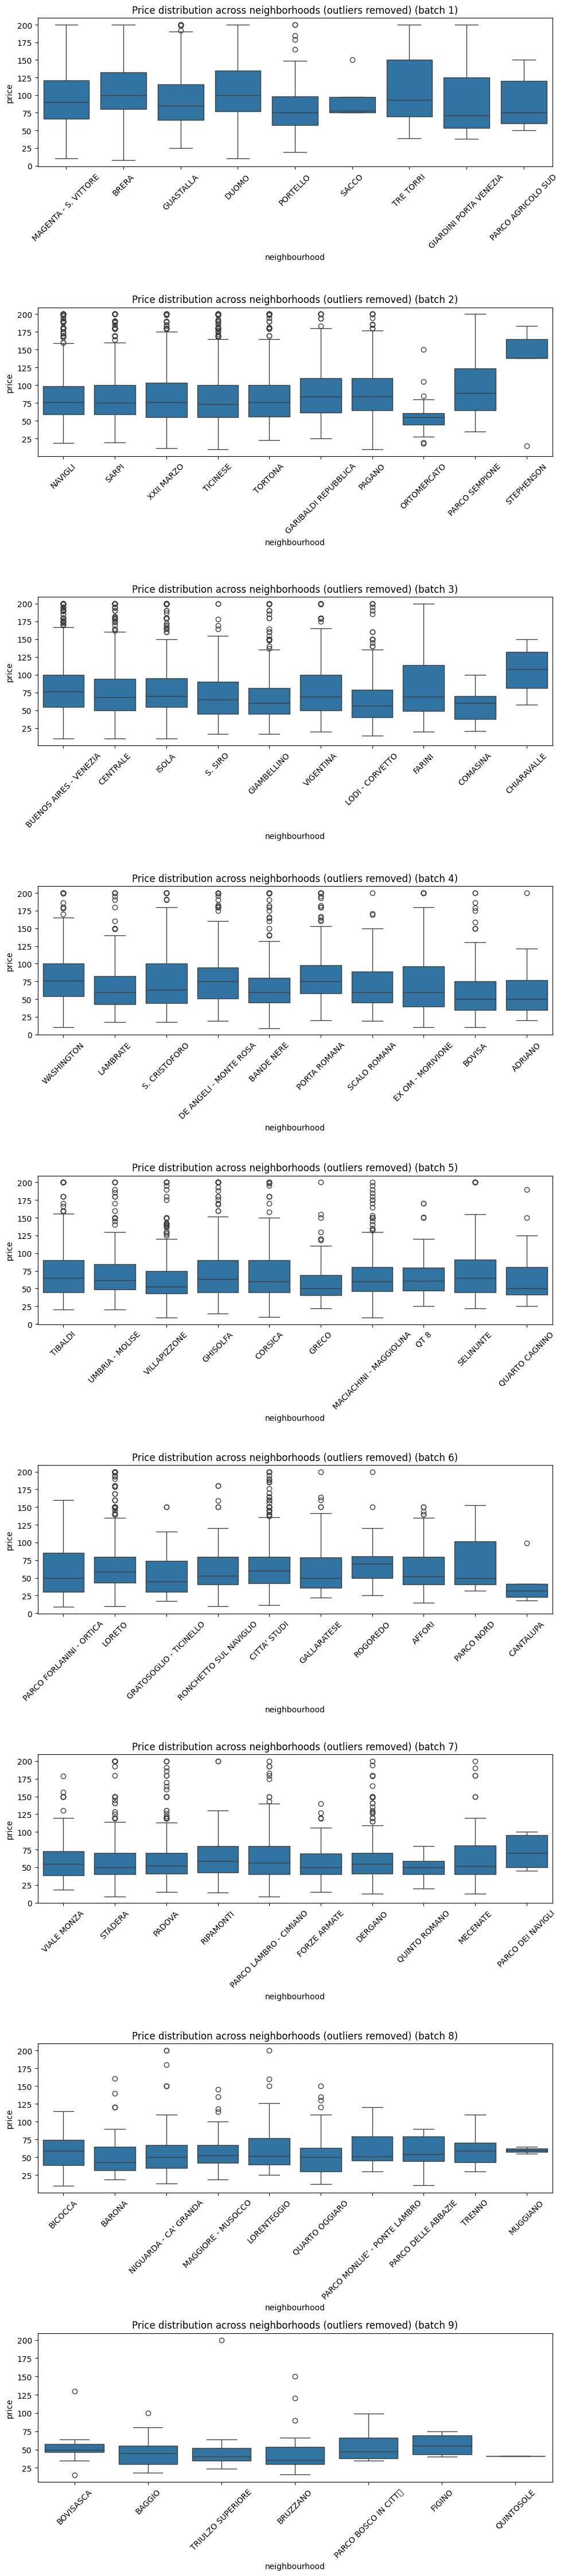

In [55]:
plot_boxplots(df_filtered, "Price distribution across neighborhoods (outliers removed)")

Removing the top 8.7% most expensive listings significantly improves readability. The interquartile ranges are now visible, and we can more clearly compare median prices across neighborhoods. The overall pattern remains consistent—more expensive neighborhoods (in the first plots) have median prices around €100, while less expensive ones (in later plots) are closer to €50. This confirms that **location is a key driver of price**, and we expect `neighbourhood` to be an important predictor in our models.

#### Price vs Room Type
Now, we generate a single boxplot  to analyze the impact the room type has on Price.

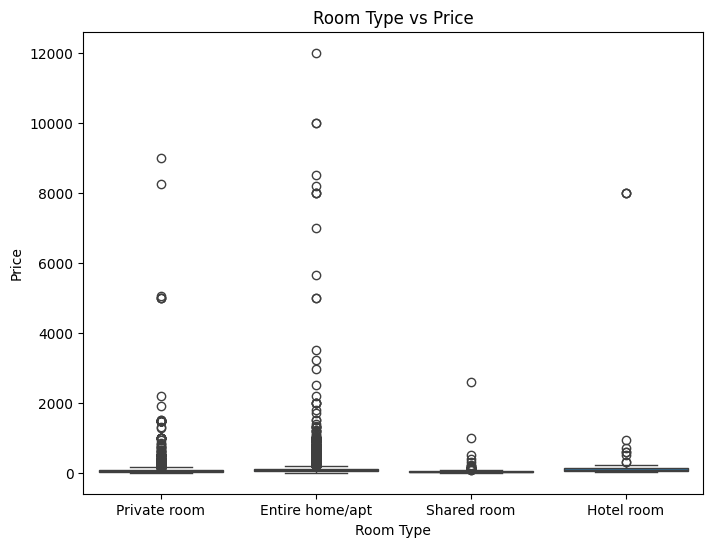

In [56]:
plt.figure(figsize=(8,6))
sb.boxplot(x=df['room_type'],y=df['price'])
plt.title("Room Type vs Price")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

However, similar to the neighborhood analysis, we observe that extreme price outliers compress the main part of the boxplot, making it difficult to clearly compare median prices and interquartile ranges (Q1–Q3) across room types.  

To improve visibility, we will generate a second boxplot using the filtered dataset, where the top 5% most extreme price outliers have been removed. 

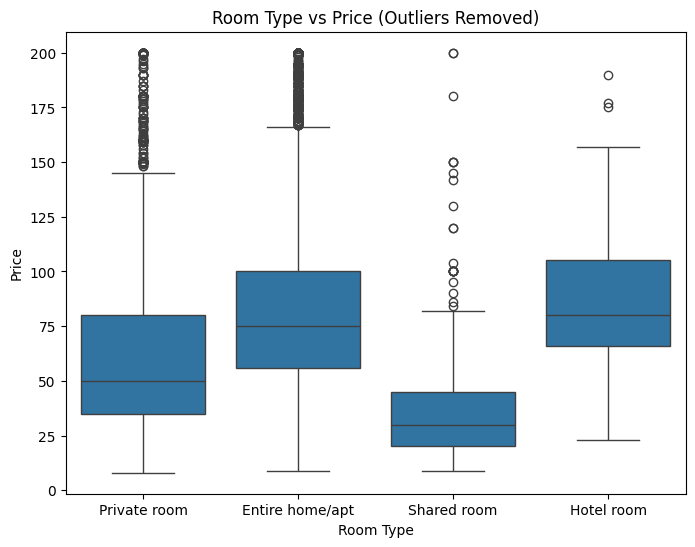

In [57]:
plt.figure(figsize=(8,6))
sb.boxplot(x=df_filtered['room_type'], y=df_filtered['price'])
plt.title("Room Type vs Price (Outliers Removed)")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

Again, removing the outliers allowed us too see more clearly the main part of the distribution of price along different room types.

The observations align with expectations:  
- **Shared rooms** have the lowest median price, as well as the fewest and least extreme outliers.  
- **Private rooms** are slightly more expensive but remain within a similar price range.  
- **Entire apartments/homes and hotel rooms** have significantly higher median prices, along with more extreme outlier values.  

This suggests that comfort level is a strong driver of price, as listings offering more privacy and amenities tend to be more expensive.  

Given this, we expect room type to be an important predictor in our machine learning models.  

### 4.2.3. Correlation Matrix: Numerical Variables

Now that we have analyzed categorical variables, we return to numerical variables to examine correlations.  

A correlation matrix allows us to:  
- Identify which numerical features are strongly or weakly related to price.  
- Detect multicollinearity (strong correlations between independent variables).  
- Guide feature selection for our predictive models.  

We will visualize the correlation matrix using a heatmap for better interpretation.

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review']
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'days_since_last_review'],
      dtype='object')


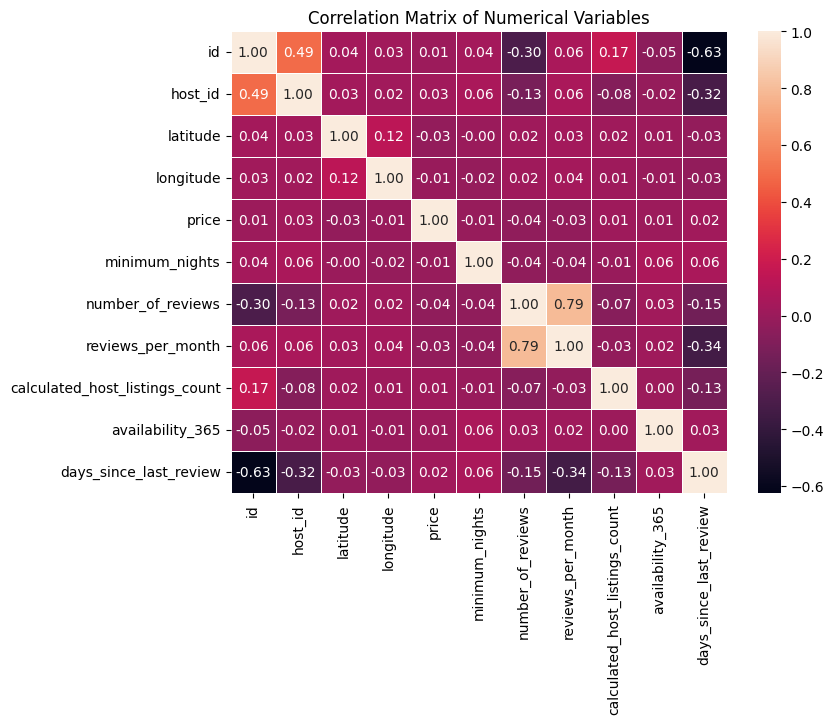

In [58]:
print(num_vars)
print(df.columns)

# correlation matrix
corr_matrix = df[num_vars].corr()

# plot heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

#### Observations on Correlation Matrix  

- Price shows **no strong correlation** with any numerical variable, suggesting that other factors, such as categorical features (e.g., neighborhood, room type), may play a larger role in determining price.  
- Latitude and longitude have very weak correlations with price, confirming that raw coordinates alone are not strong predictors.  
- Minimum nights does not show any meaningful relationship with price, indicating that stay duration does not significantly affect pricing.  
- The number of reviews and reviews per month have a weak **negative correlation** with price, suggesting that lower-priced listings tend to receive more reviews. This could be because budget-friendly accommodations attract more short-term guests.  
- The number of reviews and reviews per month are highly correlated with each other (0.79), meaning that one of them might be redundant and could be removed in feature selection.  
- Other numerical variables, such as availability and host listing count, do not exhibit meaningful correlations with price.  


In conclusion, the correlation matrix suggests that numerical variables alone are NOT strong predictors of price, and categorical factors like neighborhood and room type may have a greater influence (as seen by our boxplots in the previous section).


## 4.3. Conclusion EDA
In conclusion, the EDA revealed that price is heavily influenced by categorical variables like neighborhood and room type, while numerical features show weaker correlations. This guides our feature selection and modeling strategy in the next steps.

# 5. Unsupervised learning : Clustering

 Clustering is an unsupervised learning technique that groups similar data points based on their characteristics. In this case, we apply clustering to **longitude and latitude** to group Airbnb listings into different location-based clusters.  

To determine the best number of clusters, we use the **elbow plot method**, which helps us find a balance between too few clusters (oversimplified) and too many clusters (overfitting the data).  

We will perform clustering twice:  
1. Using the optimal number of clusters found in the elbow plot, to get meaningful groups.  
2. Using a higher number of clusters (e.g., 10) to introduce more variability and check if finer clustering (e.g., central neighborhoods) reflects differences in pricing. 


## 5.1. Clustering using elbow plot

The elbow method is used to determine the optimal number of clusters (**k**) in K-Means clustering. It works by plotting the **within-cluster sum of squares (WCSS)** for different values of k and identifying the point where adding more clusters no longer significantly reduces WCSS.  

The "elbow point" is where the curve starts to flatten (literally, the elbow of the plot), indicating that increasing k beyond this point provides little improvement in clustering quality.  


In [59]:
# extract longitude and latitude for clustering
location_data = df[["longitude", "latitude"]]

# standardize the features for better clustering performance
scaler = StandardScaler()
location_scaled = scaler.fit_transform(location_data)

# compute WCSS for different values of k
wcss = []  
k_values = range(1, 11)  # testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(location_scaled)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

  File "c:\Users\emmaa\OneDrive\Documents\0. NTU\__CB0494_INTRO_DS_AI\CB0494_DSAI_CODING\dsai\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


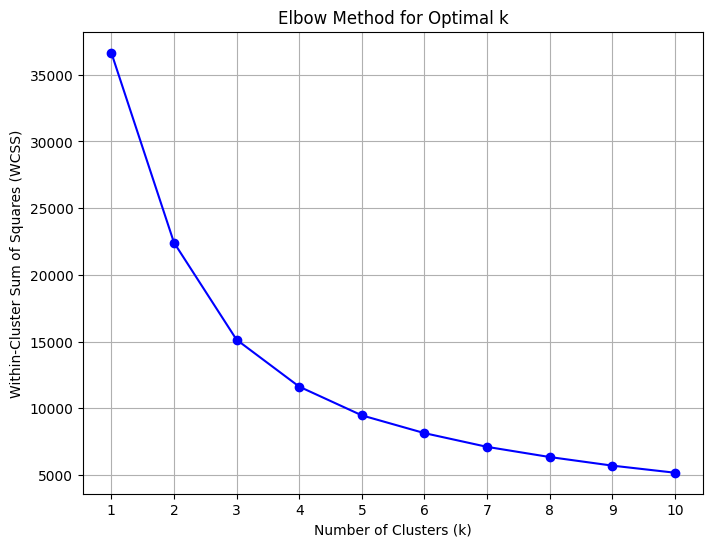

In [60]:
# plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Based on the plot, the optimal number of clusters is either 3 or 4 - these are the points where the curve starts flattening significantly. We will chose k=4 for our analysis.

In [61]:
# apply k-means clustering with k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster_4"] = kmeans_4.fit_predict(location_scaled)

# store cluster centers for visualization
cluster_centers_4 = scaler.inverse_transform(kmeans_4.cluster_centers_)

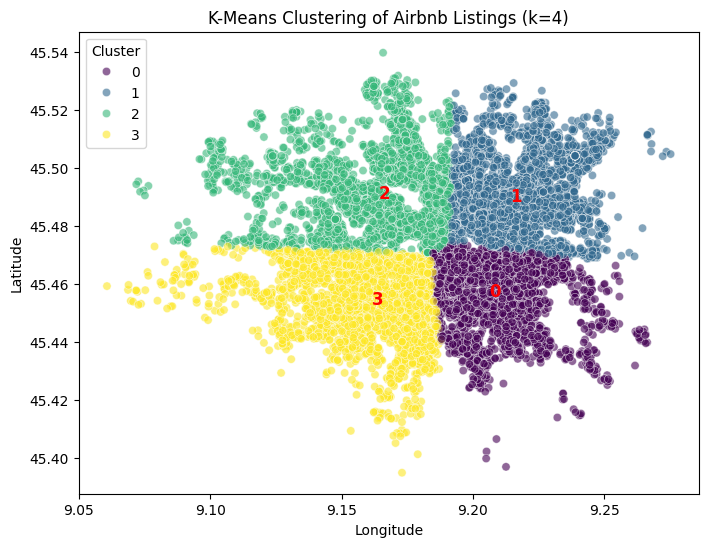

In [62]:
plt.figure(figsize=(8,6))

# scatter plot of clustered locations
sb.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["cluster_4"], palette="viridis", alpha=0.6)

# add cluster centers with labels
for i, (lon, lat) in enumerate(cluster_centers_4):
    plt.text(lon, lat, str(i), fontsize=12, color="red", fontweight="bold", ha="center")

plt.title("K-Means Clustering of Airbnb Listings (k=4)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


Now, we want to proceed by studying the price distribution across different clusters by using boxplots.

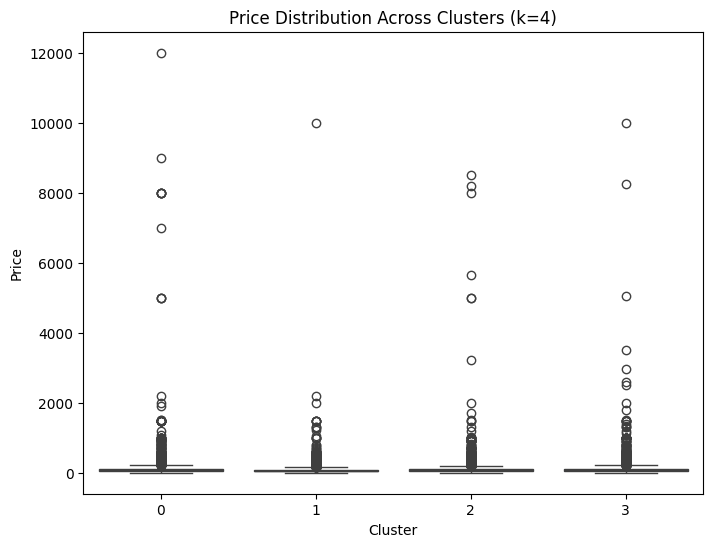

In [63]:
plt.figure(figsize=(8,6))
sb.boxplot(x=df["cluster_4"], y=df["price"])
plt.title("Price Distribution Across Clusters (k=4)")
plt.xlabel("Cluster")
plt.ylabel("Price")
plt.show()

However, we observe the same problem as we did when generating box-plots between the categorical variables and price in the joint distribution analysis section. The presence of extreme outliers compresses the main part of the distribution, making it difficult to compare median prices and interquartile ranges across clusters. 

We have two options:  
- Apply the same approach as before and remove the top 5% of outliers.  
- Apply a log transformation to price in order to reduce skewness and spread out lower values, making the distributions easier to compare without removing any data.  

Since we want to preserve all data points, we choose the **log-transformation approach** to better visualize price variations across clusters. 

In [64]:
# create a log-transformed price column
df["log_price"] = np.log1p(df["price"])  # log1p ensures no issues with zero values

Now, we generate a boxplot of the log(price) across different clusters.

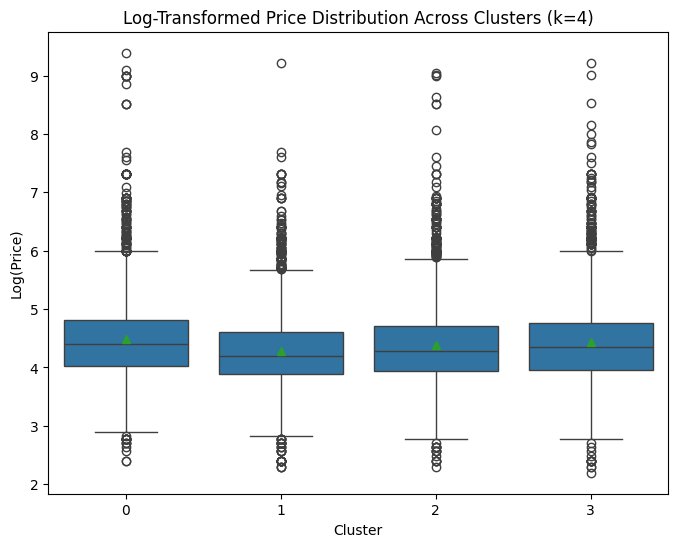

In [65]:
plt.figure(figsize=(8,6))
sb.boxplot(x=df["cluster_4"], y=df["log_price"], showmeans =  True)
plt.title("Log-Transformed Price Distribution Across Clusters (k=4)")
plt.xlabel("Cluster")
plt.ylabel("Log(Price)")
plt.show()


#### Observations on Clustering with k=4  

With the log transformation, the boxplots are now clearly visible, and we can compare price distributions across clusters. However, there is NO significant difference in price between regions, as the median and overall range are quite similar across clusters.  

Next, we proceed with **k=10**, which introduces more **variability** and may help reveal finer price differences between specific areas.  


## 5.2. Clustering with k=10

In [66]:
# apply k-means clustering with k = 10
kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10)
df["cluster_10"] = kmeans_10.fit_predict(location_scaled)

# store cluster centers for visualization
cluster_centers_10 = scaler.inverse_transform(kmeans_10.cluster_centers_)

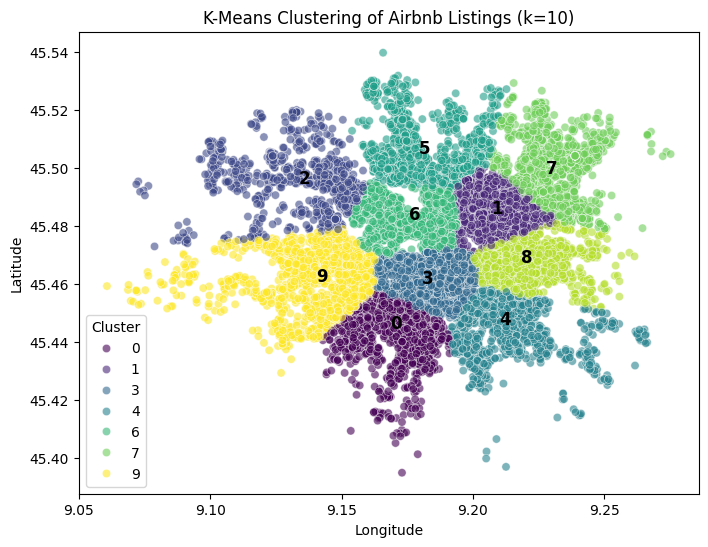

In [67]:
plt.figure(figsize=(8,6))

# scatter plot of clustered locations
sb.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["cluster_10"], palette="viridis", alpha=0.6)

# add cluster centers with labels
for i, (lon, lat) in enumerate(cluster_centers_10):
    plt.text(lon, lat, str(i), fontsize=12, color="black", fontweight="bold", ha="center")

plt.title("K-Means Clustering of Airbnb Listings (k=10)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


We proceed by directly looking at the distribution of log(price) across cluster regions.

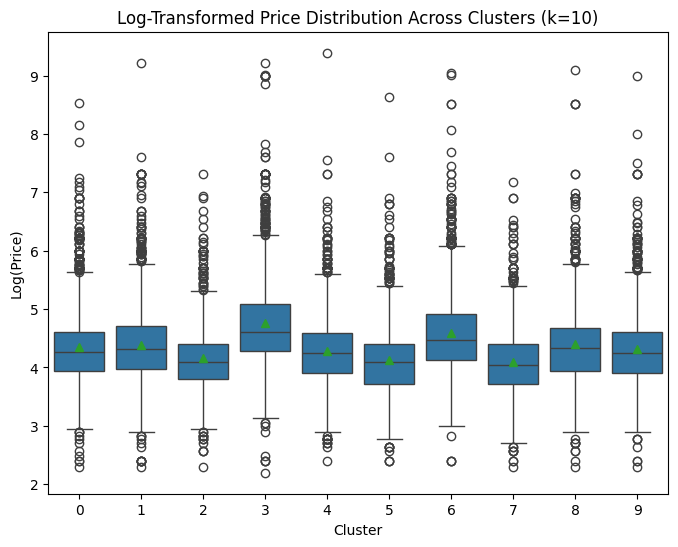

In [68]:
plt.figure(figsize=(8,6))
sb.boxplot(x=df["cluster_10"], y=df["log_price"], showmeans=True)
plt.title("Log-Transformed Price Distribution Across Clusters (k=10)")
plt.xlabel("Cluster")
plt.ylabel("Log(Price)")
plt.show()


#### Observations on Clustering with k=10  

With k=10, we see more variation in price distributions compared to k=4. Some clusters, especially clusters 3 and 6, stand out as having higher median prices. As we can also see visually (cluster visualization figure), they correspond to the most central areas of Milan, where Airbnb listings tend to be more expensive.  

This suggests that increasing the number of clusters allowed for better differentiation between neighborhoods, particularly those in the city center versus the outskirts.  

## 5.3 Outliers Analysis per Clusters

In [69]:
# iqr-based outlier analysis for each cluster
outlier_summary = []

for cluster_id in sorted(df['cluster_10'].unique()):
    cluster_data = df[df['cluster_10'] == cluster_id]
    prices = cluster_data['price']

    # we already have Q1_price and Q3_price from before

    # outlier bounds
    lower_bound_price = Q1_price - 1.5 * IQR_price
    upper_bound_price = Q3_price + 1.5 * IQR_price

    # detect outliers
    outliers = prices[(prices < lower_bound_price) | (prices > upper_bound_price)]
    n_outliers = outliers.count()
    total = prices.count()
    outlier_pct = (n_outliers / total) * 100

    # record summary
    outlier_summary.append({
        'cluster': cluster_id,
        'outlier_count': n_outliers,
        'total_points': total,
        'outlier_percentage': round(outlier_pct, 2),
        'min_outlier_price': outliers.min() if not outliers.empty else None,
        'max_outlier_price': outliers.max() if not outliers.empty else None
    })

# convert to dataframe and show
outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Analysis per Cluster:")
display(outlier_df)


Outlier Analysis per Cluster:


cluster  outlier_count  total_points  outlier_percentage  \
0        0            200          2447                8.17   
1        1            194          2455                7.90   
2        2             48           888                5.41   
3        3            406          2446               16.60   
4        4             98          1669                5.87   
5        5             62          1240                5.00   
6        6            279          2323               12.01   
7        7             48          1392                3.45   
8        8            126          1634                7.71   
9        9            134          1828                7.33   

   min_outlier_price  max_outlier_price  
0                206               5050  
1                201               9999  
2                205               1498  
3                201              10000  
4                201              11999  
5                203               5640  
6                201               8500  
7                201               1300  
8                202               8990  
9                203               8000

As expected, we can see that there are more outliers (both in absolute value and in percentage) in regions 3 and 6, which are the most central regions in Milan and also exhibited higher median prices compared to other regions.

## 5.4. Clustering with other values of k

In addition to the main clustering analysis, we apply KMeans clustering with different values of \( k \)  8, and 12) to the latitude and longitude coordinates. These alternative clusterings are saved as separate variables and may serve as useful features for our predictive models.

We will assess their relationship with price in the feature selection phase. If a specific clustering better captures price variability across neighborhoods, it may be included as a feature in the final model.

In [70]:
# define and assign new clustering results
k_values = [8, 12]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df[f'cluster_{k}'] = kmeans.fit_predict(location_scaled)

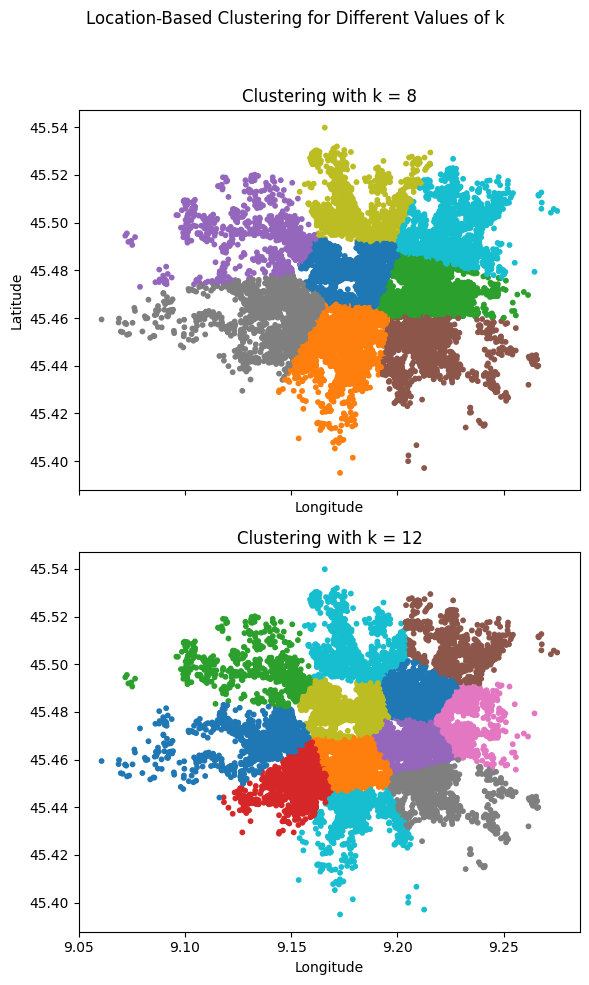

In [71]:
fig, axes = plt.subplots(2, 1, figsize=(6, 10), sharex=True, sharey=True)
k_values = [8, 12]

for i, k in enumerate(k_values):
    ax = axes[i]
    scatter = ax.scatter(
        df['longitude'], df['latitude'],
        c=df[f'cluster_{k}'], cmap='tab10', s=10
    )
    ax.set_title(f'Clustering with k = {k}')
    ax.set_xlabel('Longitude')
    if i == 0:
        ax.set_ylabel('Latitude')

plt.suptitle('Location-Based Clustering for Different Values of k')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 6. Feature Selection + Engineering

The goal of this step is to identify which variables should be included in our predictive models.

We begin by introducing a few new features based on the existing variables. This step allows us to model underlying relationships and interactions that may not be captured by the raw features alone, and potentially improve the performance of our models.

We then exclude variables that are irrelevant for modeling, such as IDs and textual fields with no predictive value. The target variable `price` is also excluded from the input features.

Next, we evaluate the remaining candidate features using simple diagnostic tools:
- For numerical features: correlation with price and previous EDA insights
- For categorical features: number of unique categories, impact on price from boxplots, and interpretability

These insights will guide which features we retain and which we discard before training our models.

## 6.1. Feature Engineering

#### Host Type: Professional vs. Casual

We define a new binary variable `is_professional_host` to distinguish between professional hosts and casual hosts. Hosts with 5 or more listings are considered professional (`is_professional_host = 1`), while those with fewer are considered casual (`is_professional_host = 0`). This feature aims to capture differences in pricing strategy and quality between the two groups.

In [72]:
df['is_professional_host'] = (df['calculated_host_listings_count'] >= 10).astype(int)

#### High availability indicator
We create a new binary feature `is_high_availability` that indicates whether a listing is available for at least 250 days in a year. This feature helps distinguish between full-time rentals (value 1) and part-time or occasional listings (value 0). Listings with consistently high availability may follow different pricing strategies and attract different types of guests, potentially influencing their price.

In [73]:
df["is_high_availability"] = (df["availability_365"] >= 250).astype(int)

#### Long Minimum Stay Indicator

We create a binary feature `is_long_min_stay` that identifies listings requiring a minimum stay of 7 nights or more. A value of 1 indicates long minimum stay listings, which may cater to different types of guests, such as business travelers or temporary residents. These listings might follow distinct pricing strategies compared to short-stay listings, making this feature potentially useful for prediction.

In [74]:
df["is_long_min_stay"] = (df["minimum_nights"] >= 7).astype(int)

## 6.2. Exclude irrelevant variables

First, we will create a list of all our potential features, i.e. using the columns of the dataframe.
Then, we will determine a list of features to exclude, such as the target variable `price`, irrelevant predictors, such as textual fields with no predictive value.

In [75]:
all_vars = df.columns.tolist()
all_vars

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'days_since_last_review',
 'cluster_4',
 'log_price',
 'cluster_10',
 'cluster_8',
 'cluster_12',
 'is_professional_host',
 'is_high_availability',
 'is_long_min_stay']

In [76]:
vars_to_exclude = ['price', 'log_price', 'id', 'name', 'last_review']

We exclude our target variable `price` (and its log transformation), as well as textual variables with no predictive power (e.g. `id`, `host_name`).
Finally, we also exclude `last_review`, as it is encoded as a textual variable and also pretty similar to `reviews_per_month` and `number_of_reviews` which might prove to me more useful.

However, we do not exclude `host_id` for now, as we saw earlier that there are some hosts that manage a large number of properties, including properties with outlier prices (>= 200.0 as determined in outlier detection section)

## 6.3. Numerical variables

In this section, we perform additional analysis in order to determine which numerical variables provide very little to no predictive value for our future machine learning models, and which ones might be useful.

To do so, we will perform correlation analysis between price and the numerical variables.
However, it is important to note that correlation only captures linear relationships between variables. Thus, a low correlation does not necessarily mean no relation between the two variables. This is something we need to keep in mind for our future analysis.

In [77]:
# we redefine num_vars, including also the results from the clustering
num_vars = df.select_dtypes(include=['number']).columns.tolist()  # numerical variables 
num_vars

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'days_since_last_review',
 'cluster_4',
 'log_price',
 'cluster_10',
 'cluster_8',
 'cluster_12',
 'is_professional_host',
 'is_high_availability',
 'is_long_min_stay']

In [78]:
# show correlation with price
corr_with_price = df[num_vars].corr()["price"].sort_values(ascending=False)
print("Correlation with price:")
print(corr_with_price)

Correlation with price:
price                             1.000000
log_price                         0.544355
host_id                           0.025895
days_since_last_review            0.024479
is_professional_host              0.014824
is_high_availability              0.010286
calculated_host_listings_count    0.009837
id                                0.009039
availability_365                  0.005506
longitude                        -0.007125
cluster_10                       -0.009852
cluster_4                        -0.013325
minimum_nights                   -0.014833
cluster_12                       -0.019433
latitude                         -0.025117
reviews_per_month                -0.031512
is_long_min_stay                 -0.034012
number_of_reviews                -0.041023
cluster_8                        -0.079831
Name: price, dtype: float64


In [79]:
# confirm high correlations between clusters, longitude and latitude
df[['longitude', 'latitude', 'cluster_8', 'cluster_10']].corr()

longitude  latitude  cluster_8  cluster_10
longitude    1.000000  0.123878   0.219492    0.022675
latitude     0.123878  1.000000   0.389318    0.208058
cluster_8    0.219492  0.389318   1.000000    0.286669
cluster_10   0.022675  0.208058   0.286669    1.000000

**Note** : we should ignore the correlations between price with itself, and price with log-price.

Although the correlations between the numerical features and price are all very low (close to zero), this does not necessarily mean these features are not useful. Correlation only captures linear relationships, and features may still contribute predictive value through non-linear effects or interactions with other variables.

As a general rule, we discard variables with an absolute correlation below 0.01. However, we make an exception for features that are logically important or showed structure in the EDA. 

From out location-based features (clustering, latitude, longitude), we retain `cluster_8`, as it has the highest absolute correlation with price from all location-based features. We cannot include all location-based features as they are highly correlated and would introduce redundancy into the model.

To sum up, we base feature selection not only on correlation, but also on interpretability and insights gained during EDA and unsupervised learning.

In [80]:
# final numerical features based on correlation + EDA
selected_numerical = [
    'minimum_nights', 
    'cluster_8',
    'number_of_reviews',
    'reviews_per_month',
    'host_id',
    'days_since_last_review',
    'is_professional_host',
    'is_long_min_stay',
    'is_high_availability'
]

print("Selected numerical features:")
print(selected_numerical)

Selected numerical features:
['minimum_nights', 'cluster_8', 'number_of_reviews', 'reviews_per_month', 'host_id', 'days_since_last_review', 'is_professional_host', 'is_long_min_stay', 'is_high_availability']


## 6.4. Categorical features

Using the information we obtained for the categorical features in the EDA section, we decide to keep two of the categorical variables : `neighbourhood` and `room_type`.

In [81]:
selected_categorical = ['room_type', 'neighbourhood']

## 6.5. Final features

In [82]:
features = selected_numerical + selected_categorical
print(features)

['minimum_nights', 'cluster_8', 'number_of_reviews', 'reviews_per_month', 'host_id', 'days_since_last_review', 'is_professional_host', 'is_long_min_stay', 'is_high_availability', 'room_type', 'neighbourhood']


# 7. Data preprocessing and cleaning

Before we start building our predictive models, we need to appropriately clean and pre-process the data.
For example, handle missing values and determine appropriate encodings for the categorical variables.

## 7.1. Handling missing values

In [83]:
# check missing values for all selected features
missing_values_full = df[features].isnull().sum()

# print the full series to verify
print("Missing values in all selected features:")
print(missing_values_full[missing_values_full>0])


Missing values in all selected features:
reviews_per_month         5062
days_since_last_review    5062
dtype: int64


Now, we will create two copies of our dataframe, on which we will handle the missing values and perform imputation (df_models) or drop them (df_models_reduced).

That way, we avoid changing our original dataframe.

In [84]:
# copy of dataframe
df_models = df.copy()
df_models_reduced = df.copy()

#### Approach 1 : Imputation

In [85]:
df_models['reviews_per_month'].fillna(0, inplace=True)
df_models['days_since_last_review'].fillna(df['days_since_last_review'].max(), inplace=True)

In [86]:
print("Missing values per column after imputation:")
print(df_models[features].isnull().sum())  # Should be 0

Missing values per column after imputation:
minimum_nights            0
cluster_8                 0
number_of_reviews         0
reviews_per_month         0
host_id                   0
days_since_last_review    0
is_professional_host      0
is_long_min_stay          0
is_high_availability      0
room_type                 0
neighbourhood             0
dtype: int64


- We imputed `reviews_per_month` with 0, since listings with missing values likely have no reviews.
- For `days_since_last_review`, we used the maximum value, assuming that listings with no reviews have been inactive the longest.

#### Approach 2 : Dropping missing values

In [87]:
# dropping missing values here
df_models_reduced = df_models_reduced[features + ["price"]].dropna()
print("Shape after dropping missing values:", df_models_reduced.shape)


Shape after dropping missing values: (13260, 12)


We dropped the columns that had missing values for `reviews_per_month` and `days_since_last_review`.

## 7.2. Apply numerical encodings for categorical features

In this step, we numerically encode the categorical variables so that they can be used by our machine learning models, which only accept numerical inputs. 

Since linear regression interprets numerical values as ordered, we ensure the encoding reflects meaningful order—for example, assigning 1 to the least comfortable room type (shared room) and 4 to the most comfortable (entire home or hotel). This helps the model interpret category levels in a way that aligns with their likely impact on price.

In [88]:
# define mapping for ordinal encoding
room_type_mapping = {
    'Shared room': 1,
    'Private room': 2,
    'Hotel room' : 3,
    'Entire home/apt': 4
}

# apply encoding
df_models['room_type_encoded'] = df_models['room_type'].map(room_type_mapping)
df_models_reduced['room_type_encoded'] = df_models_reduced['room_type'].map(room_type_mapping)

In [89]:
# sort neighborhoods by mean price, then apply encoding (lower values for least expensive, higher for expensive)
neighborhood_avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
neighborhood_mapping = {name: i+1 for i, name in enumerate(neighborhood_avg_price.index)}
df_models['neighbourhood_encoded'] = df_models['neighbourhood'].map(neighborhood_mapping)
df_models_reduced['neighbourhood_encoded'] = df_models_reduced['neighbourhood'].map(neighborhood_mapping)

We encoded `room_type` manually using ordinal mapping based on comfort level.
For `neighbourhood`, we used label encoding based on the average price per neighborhood — neighborhoods with lower average prices were given lower numeric codes. This preserves some ordinal meaning and avoids using one-hot encoding, which is not recommended, as mentioned in class.

In [90]:
# update feature list
features.remove('room_type')
features.remove('neighbourhood')
features.append('room_type_encoded')
features.append('neighbourhood_encoded')

Now, we print the datatypes of our selected features, to ensure they are all numerical and can be handled by our linear regression and decision tree models.

In [91]:

print(df_models[features].dtypes)

minimum_nights              int64
cluster_8                   int32
number_of_reviews           int64
reviews_per_month         float64
host_id                     int64
days_since_last_review    float64
is_professional_host        int64
is_long_min_stay            int64
is_high_availability        int64
room_type_encoded           int64
neighbourhood_encoded       int64
dtype: object


In [92]:

print(df_models_reduced[features].dtypes)

minimum_nights              int64
cluster_8                   int32
number_of_reviews           int64
reviews_per_month         float64
host_id                     int64
days_since_last_review    float64
is_professional_host        int64
is_long_min_stay            int64
is_high_availability        int64
room_type_encoded           int64
neighbourhood_encoded       int64
dtype: object


All is correct. We can now proceed with building our predictive models.

## 7.3. Remove outliers

We added this step after observing poor model performance in our initial Decision Tree and Linear Regression models.
We suspect that the presence of luxury listings with extremely high prices distorts the pricing patterns observed in typical Airbnb listings, introducing noise and bias into the models.

Therefore, we decide to train a separate model using a filtered dataset, in which we remove the outliers, to better represent the general price level of typical Airbnbs in Milan.

In our EDA, we used the **IQR method** to detect price outliers.

We found that:
- Listings with `price ≥ 200.0` are considered outliers.
- These represent about **8.7%** of the total dataset.

To reduce the impact of extreme values and improve model performance, we now remove all listings with `price ≥ 200.0` from the dataset. This ensures our predictive models are trained on typical Airbnb listings and are not skewed by luxury or anomalous properties.

In [93]:
# remove price outliers based on EDA threshold (price ≥ 200.0)
df_models_no_outliers = df_models[df_models["price"] < 200.0].copy()
df_models_reduced_no_outliers = df_models_reduced[df_models_reduced["price"] < 200.0].copy()
df_models_IQR_price_range = df_models[(df_models["price"] <= 130) & (df_models["price"] >= 30)].copy()

# check new shapes
print("Original dataset shape (df_models):", df_models.shape)
print("Filtered dataset shape (df_models_no_outliers):", df_models_no_outliers.shape)
print("\nOriginal dataset shape (df_models_reduced):", df_models_reduced.shape)
print("Filtered dataset shape (df_models_reduced_no_outliers):", df_models_reduced_no_outliers.shape)


Original dataset shape (df_models): (18322, 26)
Filtered dataset shape (df_models_no_outliers): (16401, 26)

Original dataset shape (df_models_reduced): (13260, 14)
Filtered dataset shape (df_models_reduced_no_outliers): (12294, 14)


# 8. Supervised learning

## 8.1. Linear Regression

We begin our modeling with Linear Regression to evaluate whether a simple linear combination of the available features can explain listing prices.

We test two versions of the model:

- **Model 1** is trained on the full dataset. It performs poorly due to extreme price outliers (luxury listings) that distort the overall linear relationship between features and price.
- **Model 2** is trained on a reduced dataset where price outliers (price ≥ 200€) were removed. The model shows a clear improvement, achieving a test MSE of **1052.58** and an R² of **0.222**. This suggests that standard listings do follow a more linear pricing pattern than outliers.

However, even after removing extreme prices, **the model is still not highly accurate**. This is likely due to the noisy nature of the data and the limited number of relevant features. Airbnb pricing is influenced by many factors we do not observe in our dataset — such as apartment size, interior quality, year built, view, and amenities, which limits the predictive power of a simple linear model.

Overall, Linear Regression provides a reasonable baseline, but its performance is constrained by missing information and noisy data.

### 8.1.1. Model 1 : Full dataset

In [94]:
# define features and target
X_lr_1 = df_models[features]
y_lr_1 = df_models["price"]

# train-test split
X_lr_1_train, X_lr_1_test, y_lr_1_train, y_lr_1_test = train_test_split(
    X_lr_1, y_lr_1, test_size=0.20, random_state=42
)

# initialize and train model
lr_model_1 = LinearRegression()
lr_model_1.fit(X_lr_1_train, y_lr_1_train)

# make predictions
y_lr_1_pred = lr_model_1.predict(X_lr_1_test)

# evaluate model
mse_lr_1 = mean_squared_error(y_lr_1_test, y_lr_1_pred)
r2_lr_1 = r2_score(y_lr_1_test, y_lr_1_pred)

# print results
print(f"test mse (lr model 1): {mse_lr_1:.2f}")
print(f"test r² (lr model 1): {r2_lr_1:.3f}")

test mse (lr model 1): 23216.37
test r² (lr model 1): 0.067


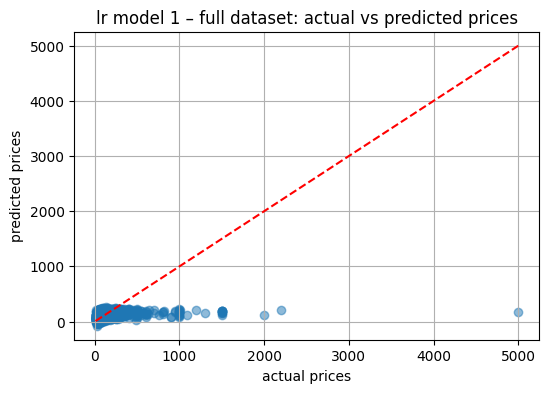

In [95]:
# plot actual vs predicted prices
plt.figure(figsize=(6, 4))
plt.scatter(y_lr_1_test, y_lr_1_pred, alpha=0.5)
plt.plot([y_lr_1_test.min(), y_lr_1_test.max()],
         [y_lr_1_test.min(), y_lr_1_test.max()], 'r--')
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("lr model 1 – full dataset: actual vs predicted prices")
plt.grid(True)
plt.show()

We observe very poor performance, likely due to the price outliers influencing the model.
We will proceed by dropping all price outliers (defined by price > 200.00 as shown in outlier analysis section, determioned using IQR method), and training our subsequent models on the reduced dataset.

### 8.1.2. Model 2 : No outliers

In this model, we train a Linear Regression model on a cleaned version of the dataset, where we removed the most expensive listings (price ≥ 200€). These outliers were identified using the IQR method in the outlier analysis section and are known to introduce high variance that distorts the overall linear trend.

By removing these listings, we aim to capture the linear relationship between features and price for standard Airbnb listings more effectively.

After training the model, we observe a **notable improvement in both MSE and R²** compared to Model 1. The reduction in noise allows the model to better estimate prices and generalize more reliably on unseen data.

This confirms that **linear regression is unable to accommodate luxury listings**, which likely follow a different pricing logic that is not captured by our current features.

In [96]:
# define features and target
X_lr_2 = df_models_no_outliers[features]
y_lr_2 = df_models_no_outliers["price"]

# train-test split
X_lr_2_train, X_lr_2_test, y_lr_2_train, y_lr_2_test = train_test_split(
    X_lr_2, y_lr_2, test_size=0.20, random_state=42
)

# initialize and train model
lr_model_2 = LinearRegression()
lr_model_2.fit(X_lr_2_train, y_lr_2_train)

# make predictions
y_lr_2_pred = lr_model_2.predict(X_lr_2_test)

# evaluate model
mse_lr_2 = mean_squared_error(y_lr_2_test, y_lr_2_pred)
r2_lr_2 = r2_score(y_lr_2_test, y_lr_2_pred)

# print results
print(f"test mse (lr model 2 – no outliers): {mse_lr_2:.2f}")
print(f"test r^2 (lr model 2 – no outliers): {r2_lr_2:.3f}")


test mse (lr model 2 – no outliers): 1052.58
test r^2 (lr model 2 – no outliers): 0.222


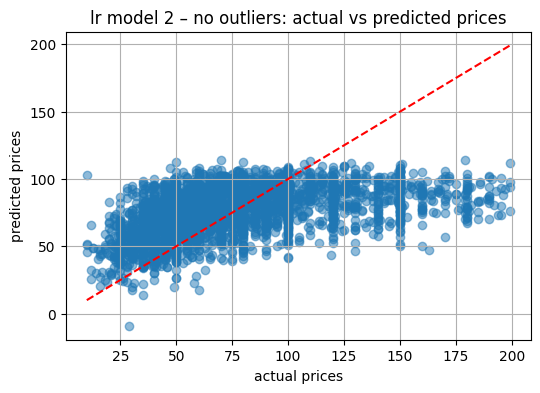

In [97]:
# plot actual vs predicted prices
plt.figure(figsize=(6, 4))
plt.scatter(y_lr_2_test, y_lr_2_pred, alpha=0.5)
plt.plot([y_lr_2_test.min(), y_lr_2_test.max()],
         [y_lr_2_test.min(), y_lr_2_test.max()], 'r--')
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("lr model 2 – no outliers: actual vs predicted prices")
plt.grid(True)
plt.show()

We observe significantly better results when dropping the outliers, which removed a lot of noise in the data.
We deduce that the outlier prices (very expensive listing) cannot be modeled with the same linear relationship to the features as the normal-price listings.

## 8.2. Decision Tree

In this section, we explore a variety of Decision Tree models to predict Airbnb listing prices. We evaluate both regression and classification approaches, each addressing specific limitations observed in the data.

#### Regression Models

We begin with standard regression models to predict the actual price value:

- **DT Model 1**: Trained on the full dataset. Performs poorly (R² = -0.43), likely due to extreme price outliers (luxury listings) that cannot be modeled effectively using the same relationships as regular listings.
  
- **DT Model 2**: Trained on a dataset with outliers removed. Performance improves significantly (R² = 0.25), confirming that outliers introduce considerable noise and bias.

- **DT Model 3**: Trained on a dataset with no outliers and no missing values (rows with missing reviews were dropped instead of imputed). Achieves slightly lower R² (0.244), but lowest MSE, suggesting reduced prediction error at the cost of slightly less explained variance.


#### Region-Based Regression Models

We then explore whether building separate models for different geographical areas improves results:

- **DT Model 4**: Separate models trained on cluster-based price groups (high, medium, low priced clusters). This helps slightly for low-priced listings but doesn’t outperform Model 2 overall. Best R² = 0.18.

- **DT Model 5**: Separate models for center vs. outer region (based on cluster proximity). Also fails to outperform Model 2 in R², but confirms regional heterogeneity in pricing behavior.


#### Classification Model

Since predicting exact prices is difficult given the noise and missing features in the dataset, we reframed the task as a **binary classification problem**, grouping listings into two categories: **low price** (below median) and **high price** (above median).

- **DT Classification Model**: Trained on the outlier-filtered dataset using selected features, this model achieved an **accuracy of 0.703**. This is a significant improvement compared to the best regression model (R² ≈ 0.25), confirming that predicting broader price tiers is more effective and realistic in this context.


-------


#### Conclusion:  
Our results suggest that the Airbnb price dataset is too noisy for precise price regression using basic decision trees. However, classification into **price categories** performs significantly better and can be a practical alternative when modeling pricing behavior.


### 8.2.1. DT model 1 : on full dataset

First, we define the features and the target, and we split the data using one of the two approaches taught in class : 
- **orderly splitting** : shuffle the data manually and split manually using slicing
- **random splitting using `train_test_split`** : use the prebuild function train_test_split, that automatically shuffles the data and splits it in the proportions we want

For simplicity, we use the second approach.

It is important not to forget to set a random seed in this step. 
We use 80% for training data, 20% for test.

In [98]:
# features and target
X_dt_1 = df_models[features]  # selected predictors
y_dt_1 = df_models["price"]   # target variable

# random splitting
X_dt_1_train, X_dt_1_test, y_dt_1_train, y_dt_1_test = train_test_split(X_dt_1, y_dt_1, test_size=0.2, random_state=42)

# initialize and train the model
max_depth = 6
dt_model_1 = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
dt_model_1.fit(X_dt_1_train, y_dt_1_train)

# make predictions
y_dt_1_pred = dt_model_1.predict(X_dt_1_test)

In [99]:
# evaluation
mse_1 = mean_squared_error(y_dt_1_test, y_dt_1_pred)
r2_1 = r2_score(y_dt_1_test, y_dt_1_pred)

# print results
print(f"Test MSE: {mse_1:.2f}")
print(f"Test R²: {r2_1:.3f}")

Test MSE: 22590.76
Test R²: 0.092


We observe very poor performance for this model. We suspect that this might be due to the outliers in the data - luxury Airbnbs in Milan, that cannot be priced using the same relationship between features-price as for the 'normal' airbnbs.

Therefore, we will now use the reduced version of the dataset `df_models_no_outliers` to create a second model and evaluate its performance.

### 8.2.2. DT model 2 : no price outliers in dataset

Additionally, we decide to use test_size=0.2 from now on, since we realize that there is a lot of random noise in the data and our models would benefit from more training data.

In [100]:
# features X and target y
X_dt_2 = df_models_no_outliers[features]
y_dt_2 = df_models_no_outliers["price"]

In [101]:
# split the data
x_dt_2_train, x_dt_2_test, y_dt_2_train, y_dt_2_test = train_test_split(
    X_dt_2, y_dt_2, test_size=0.2, random_state=42
)

In [102]:
# initialize and train the model
max_depth = 6 # best performance with max_depth = 6
dt_model_2 = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
dt_model_2.fit(x_dt_2_train, y_dt_2_train)


DecisionTreeRegressor(max_depth=6, random_state=42)

In [103]:
# make predictions on test set
y_pred_2 = dt_model_2.predict(x_dt_2_test)

In [104]:
# evaluate model
mse_2 = mean_squared_error(y_dt_2_test, y_pred_2)
r2_2 = r2_score(y_dt_2_test, y_pred_2)

# print results
print(f"Test MSE (no outliers): {mse_2:.2f}")
print(f"Test R² (no outliers): {r2_2:.3f}")

Test MSE (no outliers): 1014.81
Test R² (no outliers): 0.250


After removing the most expensive listings (price >= 200.00), using IQR method to determine which listings are considered exteme outliers, the performance of our Decision Tree model improved significantly.  
The Test MSE dropped from over 38,000 to around 1000, and the R² score increased from 0.09 to 0.250.  
This confirms our intuition that outliers (such as luxury listings) distort the general pricing trends and make the model less accurate for the majority of listings.

### 8.2.3. DT model 3 : no missing values, no price outliers

Here, we are training on a the dataset where, instead of performing imputation (with 0) for missing reviews, we just dropped rows with no reviews.

In [105]:
# features X and target y
X_dt_3 = df_models_reduced_no_outliers[features]
y_dt_3 = df_models_reduced_no_outliers["price"]


In [106]:
# split the data
x_dt_3_train, x_dt_3_test, y_dt_3_train, y_dt_3_test = train_test_split(
    X_dt_3, y_dt_3, test_size=0.2, random_state=42
)

In [107]:
# initialize and train the model
max_depth = 6 # best performance with max_depth = 6
dt_model_3 = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
dt_model_3.fit(x_dt_3_train, y_dt_3_train)


DecisionTreeRegressor(max_depth=6, random_state=42)

In [108]:
# make predictions on test set
y_pred_3 = dt_model_3.predict(x_dt_3_test)

In [109]:
# evaluate model
mse_3 = mean_squared_error(y_dt_3_test, y_pred_3)
r2_3 = r2_score(y_dt_3_test, y_pred_3)

# print results
print(f"Test MSE (reduced no outliers): {mse_3:.2f}")
print(f"Test R² (reduced no outliers): {r2_3:.3f}")

Test MSE (reduced no outliers): 908.77
Test R² (reduced no outliers): 0.244


Although Model 3 is trained on a smaller dataset (due to removing rows with missing reviews), it performs better in terms of Test MSE (lower error), but has a slightly lower R^2 compared to Model 2. This suggests that removing rows with missing review data has helped reduce prediction error, but the model is explaining a bit less of the price variation.

The trade-off here is between using less data and improving model accuracy: while Model 3 has a lower MSE, the small drop in R² shows that it might not be capturing as much of the overall price variation.

### 8.2.4. DT model 4 : separate models by price-based cluster grouping (low, medium, high prices + location)

In this approach, we split the data into three groups based on the average price of listings within each cluster from `cluster_10`. Group 1 contains the highest-priced clusters, Group 2 includes medium-priced ones, and Group 3 includes the lowest-priced clusters.

We then train a separate decision tree model for each group. The idea is that listings with similar price levels might share similar patterns or factors that affect price, so separate models might perform better than one global model.

In [110]:
# mean price for each cluster in cluster_10
mean_price_per_cluster_10 = (
    df_models_no_outliers.groupby("cluster_10")["price"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

print("Mean price by cluster (cluster_10):")
display(mean_price_per_cluster_10)


Mean price by cluster (cluster_10):


cluster_10
3    96.90
6    85.79
1    76.93
8    76.70
0    73.71
9    71.54
4    70.87
2    63.72
7    62.03
5    61.92
Name: price, dtype: float64

In [111]:
# cluster groups based on average price
group_1_clusters = [3, 6]             # High price
group_2_clusters = [1, 8, 0, 9]       # Medium price
group_3_clusters = [2, 7, 5]          # Low price

# features to use (excluding the clustering variable)
features_exclude = ['cluster_4', 'cluster_8', 'cluster_10', 'cluster_12'] 
features_dt_grouping = [feat for feat in features if feat not in features_exclude]
# features_dt_grouping.append('latitude')
# features_dt_grouping.append('longitude')

# group dictionary
cluster_groups = {
    "group_1": group_1_clusters,
    "group_2": group_2_clusters,
    "group_3": group_3_clusters
}

# initialize storage
dt_models_by_group = {}
dt_group_metrics = []

In [112]:
# loop through each group
for group_name, cluster_list in cluster_groups.items():
    # filter dataframe for this group
    df_group = df_models_no_outliers[df_models_no_outliers['cluster_10'].isin(cluster_list)].copy()

    # X and y
    X = df_group[features_dt_grouping]
    y = df_group["price"]

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # train model
    dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
    dt_model.fit(X_train, y_train)

    # predict and evaluate
    y_pred = dt_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # save model and metrics
    dt_models_by_group[group_name] = dt_model
    dt_group_metrics.append({
        "group": group_name,
        "clusters": cluster_list,
        "n_train": len(X_train),
        "n_test": len(X_test),
        "test_mse": round(mse, 2),
        "test_r2": round(r2, 3)
    })

# display evaluation
pd.DataFrame(dt_group_metrics)


group      clusters  n_train  n_test  test_mse  test_r2
0  group_1        [3, 6]     3180     796   1274.44    0.122
1  group_2  [1, 8, 0, 9]     6044    1512   1071.06    0.180
2  group_3     [2, 7, 5]     2660     666    941.97    0.159

The performance of the three models built for different price-based cluster groups shows mixed results.

The best-performing model is for **group 3** (clusters 2, 7, 5), which corresponds to the lowest-priced listings. It achieves a test MSE of 929.77 and R² of 0.170. This is slightly better in terms of MSE compared to model 2 (which had a test MSE of 1014.81), although it underperforms in R² (model 2 had 0.250).

**Group 2**, corresponding to medium-priced listings, performs reasonably well too, with a test R² of 0.189 and MSE of 1058.98. While the R² is lower than model 2, the MSE is comparable.

The **group 1** model (clusters 3 and 6), which includes the highest-priced listings, performs the worst among the three, with a test R² of 0.107 and the highest MSE of 1296.16. This suggests that modeling high-end listings may be more complex, possibly due to more variability or fewer consistent pricing patterns.

Overall, while breaking the data into groups did help lower MSE for some segments, it did not consistently improve the R² compared to model 2.

### 8.2.5. DT model 5 : center region VS outer region

In this approach, we divide the dataset into two geographic groups based on the results of the `cluster_10` location-based clustering. Specifically, we isolate clusters 3 and 6 into a single group called the center region, as these clusters exhibited the highest average prices among all clusters. All other clusters are grouped together into a second category called the outer region.

The motivation behind this modeling choice is based on the intuition that airbnb listings in central, high-demand areas may behave differently from those in outer or less central areas in terms of pricing dynamics. These differences could stem from various unobserved factors such as tourist density, neighborhood prestige, proximity to landmarks, or local infrastructure, which are not explicitly encoded in the dataset.

By training separate decision tree models for these two regions, we aim to:
- capture region-specific pricing patterns that might be diluted in a global model
- improve model accuracy by reducing variance within each modeling group
- allow for tailored interpretation of important predictors in central vs. outer zones
- potentially discover whether different features drive price variation in each region

We will compare the performance (mse, r^2) of the two models to assess whether this split leads to a meaningful gain in predictive accuracy or interpretability.

In [113]:
# define center and outer cluster groups
center_clusters = [2, 5]
df_center = df_models_no_outliers[df_models_no_outliers["cluster_10"].isin(center_clusters)].copy()
df_outer = df_models_no_outliers[~df_models_no_outliers["cluster_10"].isin(center_clusters)].copy()

# drop cluster assignments from features
features_exclude_cluster_models = ['cluster_10', 'cluster_8', 'cluster_4', 'cluster_12']
features_dt_clustering = [feat for feat in features if feat not in features_exclude_cluster_models]

# initialize dictionaries
dt_models_center_outer = {}
dt_metrics_center_outer = []

In [114]:
# model for center region
X_dt_clustering_center = df_center[features_dt_clustering]
y_dt_clustering_center = df_center["price"]
X_train_dt_clustering_center, X_test_dt_clustering_center, y_train_dt_clustering_center, y_test_dt_clustering_center = train_test_split(
    X_dt_clustering_center, y_dt_clustering_center, test_size=0.20, random_state=42
)

dt_model_dt_clustering_center = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model_dt_clustering_center.fit(X_train_dt_clustering_center, y_train_dt_clustering_center)

y_pred_dt_clustering_center = dt_model_dt_clustering_center.predict(X_test_dt_clustering_center)
mse_center = mean_squared_error(y_test_dt_clustering_center, y_pred_dt_clustering_center)
r2_center = r2_score(y_test_dt_clustering_center, y_pred_dt_clustering_center)

# store center model and metrics
dt_models_center_outer["center"] = dt_model_dt_clustering_center
dt_metrics_center_outer.append({
    "region": "center",
    "clusters": center_clusters,
    "n_train": len(X_train_dt_clustering_center),
    "n_test": len(X_test_dt_clustering_center),
    "test_mse": round(mse_center, 2),
    "test_r2": round(r2_center, 3)
})

In [115]:
# model for outer region
X_dt_clustering_outer = df_outer[features_dt_clustering]
y_dt_clustering_outer = df_outer["price"]
X_train_dt_clustering_outer, X_test_dt_clustering_outer, y_train_dt_clustering_outer, y_test_dt_clustering_outer = train_test_split(
    X_dt_clustering_outer, y_dt_clustering_outer, test_size=0.20, random_state=42
)

dt_model_dt_clustering_outer = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model_dt_clustering_outer.fit(X_train_dt_clustering_outer, y_train_dt_clustering_outer)

y_pred_dt_clustering_outer = dt_model_dt_clustering_outer.predict(X_test_dt_clustering_outer)
mse_outer = mean_squared_error(y_test_dt_clustering_outer, y_pred_dt_clustering_outer)
r2_outer = r2_score(y_test_dt_clustering_outer, y_pred_dt_clustering_outer)

# store outer model and metrics
dt_models_center_outer["outer"] = dt_model_dt_clustering_outer
dt_metrics_center_outer.append({
    "region": "outer",
    "clusters": sorted(df_outer["cluster_10"].unique().tolist()),
    "n_train": len(X_train_dt_clustering_outer),
    "n_test": len(X_test_dt_clustering_outer),
    "test_mse": round(mse_outer, 2),
    "test_r2": round(r2_outer, 3)
})

In [116]:
# display performance
dt_center_outer_perf_df = pd.DataFrame(dt_metrics_center_outer)
display(dt_center_outer_perf_df)

region                  clusters  n_train  n_test  test_mse  test_r2
0  center                    [2, 5]     1595     399    892.08    0.133
1   outer  [0, 1, 3, 4, 6, 7, 8, 9]    11525    2882   1119.71    0.213

The model trained on the **center region** (clusters 2 and 5) got a test R² of 0.133 and a test MSE of 892.08. The model for the **outer region** (all other clusters) did slightly better, with an R² of 0.213 and a test MSE of 1119.71.

Compared to our best decision tree model so far (model 2), which had a test R² of 0.250 and a test MSE of 1014.81, both the center and outer models performed worse in terms of R². This shows that separating the data into center and outer regions didn’t improve predictive performance overall, although it did help slightly for the outer region.

These models still provide useful insights into how location affects pricing, but more advanced techniques or features may be needed to get better results.

### 8.2.6. DT Classification model 1 : low vs high price categories

Since the dataset is quite noisy and exact price prediction via regression is difficult, we instead reframe the task as a **binary classification problem**: predicting whether a listing falls into a **low** or **high** price category.

To define these two categories, we recompute the **median price (Q2)** using the cleaned dataset `df_models_no_outliers` (after removing price outliers). The two groups are:
- **Low price (0):** from 0 to the median (Q2)
- **High price (1):** above the median

We then train a **Decision Tree classifier** using selected features to predict whether a listing is low or high priced. This model helps identify key factors influencing price categories, while avoiding the instability of exact price prediction in a noisy setting.

In [117]:
# recompute quantiles on df_models_no_outliers
Q1 = df_models_no_outliers['price'].quantile(0.25)
Q2 = df_models_no_outliers['price'].quantile(0.5)
Q3 = df_models_no_outliers['price'].quantile(0.75)

# print price range of each quantile
print(f"0 to Q1 : 0 to {Q1} €")
print(f"Q1 to Q2 : {Q1} to {Q2} €")
print(f"Q2 to Q3 : {Q2} to {Q3} €")
print(f"Q3 to max : {Q3} to {max(df_models_no_outliers['price'])} €")

0 to Q1 : 0 to 50.0 €
Q1 to Q2 : 50.0 to 69.0 €
Q2 to Q3 : 69.0 to 95.0 €
Q3 to max : 95.0 to 199 €


We will group the listings into 2 groups : 
- low price (0) : 0-69 €
- high price (1) : 69-199 €

In [118]:
# create a new binary target column
df_models_no_outliers['price_category_2_groups'] = pd.cut(
    df_models_no_outliers['price'],
    bins=[-float('inf'), Q2, float('inf')],
    labels=[0, 1]  # 0 = low, 1 = high
)

In [119]:
# feature chosen in feature selection section
features

['minimum_nights',
 'cluster_8',
 'number_of_reviews',
 'reviews_per_month',
 'host_id',
 'days_since_last_review',
 'is_professional_host',
 'is_long_min_stay',
 'is_high_availability',
 'room_type_encoded',
 'neighbourhood_encoded']

In [120]:
# define X and y
X_dt_class_2 = df_models_no_outliers[features]
y_dt_class_2 = df_models_no_outliers['price_category_2_groups']

# train-test split
X_train_dt_class_2, X_test_dt_class_2, y_train_dt_class_2, y_test_dt_class_2 = train_test_split(
    X_dt_class_2, y_dt_class_2, test_size=0.2, random_state=42
)

# model training
dt_class_2_model = DecisionTreeClassifier(random_state=42, max_depth=7)
dt_class_2_model.fit(X_train_dt_class_2, y_train_dt_class_2)

# predictions
y_pred_dt_class_2 = dt_class_2_model.predict(X_test_dt_class_2)

Accuracy (Binary DT): 0.7031
Confusion Matrix (Binary DT):
[[1106  561]
 [ 413 1201]]


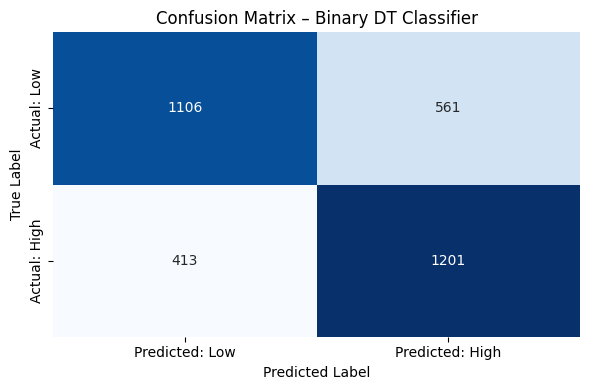

In [121]:
# evaluation
accuracy_dt_class_2 = accuracy_score(y_test_dt_class_2, y_pred_dt_class_2)
conf_matrix_dt_class_2 = confusion_matrix(y_test_dt_class_2, y_pred_dt_class_2)

# print results
print(f"Accuracy (Binary DT): {accuracy_dt_class_2:.4f}")
print("Confusion Matrix (Binary DT):")
print(conf_matrix_dt_class_2)
plt.figure(figsize=(6, 4))
sb.heatmap(conf_matrix_dt_class_2, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Predicted: Low', 'Predicted: High'],
           yticklabels=['Actual: Low', 'Actual: High'])
plt.title('Confusion Matrix – Binary DT Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

The binary DT model achieves an accuracy of **0.703**. Based on the confusion matrix, the model seems to distinguish reasonably well between low- and high-price listings.

Compared to our best regression model (DT model 2), which had an R² of **0.250**, this classification approach appears to perform better. This suggests that predicting price categories may be more effective than estimating exact prices in this dataset.


# 9. Conclusion

In this project, we analyzed the main factors influencing Airbnb rental prices in Milan and built predictive models using features such as location, room type, availability, and reviews. The goal was to explore price dynamics and improve prediction performance through a mix of techniques from:

- **EDA**:  
  - **Univariate plots**: histograms, violin plots, boxplots, and bar plots (for categorical variables).  
  - **Bivariate plots**: scatter plots (numerical vs numerical), boxplots (numerical vs categorical).  
  - **Multivariate analysis**: correlation matrix and heatmap.

- **Unsupervised learning**:  
  - **Clustering** based on geographic coordinates (longitude & latitude).  
  - **Anomaly detection** using the IQR method to remove extreme price outliers.

- **Supervised learning**:  
  - **Linear Regression** as a baseline.  
  - **Decision Tree models** for both regression and binary classification tasks.

The EDA revealed a heavily right-skewed price distribution with a few extreme outliers. To improve robustness, we applied **anomaly detection** using the IQR method (upper bound = Q3 + 1.5 × IQR), removing about 8.7% of listings. All models (except LR1 and DT1) were trained on this cleaner dataset.

We engineered new features such as `is_professional_host`, `is_long_min_stay`, and `is_high_availability`, based on the number of listings per host, the minimum required stay, and availability, respectively. These binary indicators helped highlight listing patterns and host behaviors that could impact price.

We also applied **clustering** in two ways. First, using geographic coordinates (longitude and latitude), we performed K-Means clustering with 4 and 10 clusters. The 10-cluster version gave better neighborhood granularity, with central clusters (3 and 6) corresponding to the historical center of Milan and showing noticeably higher prices. Then, we ran K-Means again using 8 engineered features. This clustering had the highest correlation with price and was included as a new feature (`cluster_8`) in the prediction models.

For **supervised learning**, we tested **linear regression** and **decision trees**. Regression performance remained moderate (best R² ≈ 0.25), likely due to missing key features like apartment size, year of construction or amenities. Reframing the task as a binary classification problem (low vs high price based on the median) significantly improved results, with the decision tree model achieving **0.703 accuracy**. This suggests that classification into broader price tiers is more reliable than predicting exact values in noisy, feature-limited datasets.